In [1]:
import re
import swifter
import spacy
import pandas as pd
from pathlib import Path
from typing import Tuple

nlp = spacy.load('en')

def parse_case_filename(fname: str) -> Tuple[int, str]:
    m = re.search(r'cases/(\d+)_(\w+).txt', str(fname))
    year = m.group(1)
    id = m.group(2)
    return year, id

case_files = [x for x in Path('cases').iterdir()]

years = []
ids = []
for x in case_files:
    year, id = parse_case_filename(x)
    years.append(year)
    ids.append(id)

df = pd.DataFrame(data={
    'id': ids,
    'year': years,
    'file': case_files},
    columns=['id', 'year', 'file'])

df = df.sample(n=1000)

df_rev = pd.read_csv('case_reversed.csv')

def get_reversed(caseid: str) -> int:
    ret = df_rev.loc[df_rev['caseid'] == caseid]
    assert ret.shape[0] == 1
    ret = ret.iloc[0]
    ret = ret['case_reversed']
    return ret

df['reversed'] = df['id'].apply(get_reversed)

def parse_file(fname: str):
    text = Path(fname).read_text()
    doc = nlp(text)
    return doc

df['doc'] = df['file'].swifter.apply(parse_file)

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 2/1000 [00:00<01:31, 10.92it/s]

Pandas Apply:   0%|          | 3/1000 [00:00<02:06,  7.87it/s]

Pandas Apply:   0%|          | 4/1000 [00:01<04:36,  3.61it/s]

Pandas Apply:   0%|          | 5/1000 [00:01<04:01,  4.12it/s]

Pandas Apply:   1%|          | 6/1000 [00:01<04:04,  4.07it/s]

Pandas Apply:   1%|          | 8/1000 [00:01<03:21,  4.92it/s]

Pandas Apply:   1%|          | 9/1000 [00:01<03:22,  4.90it/s]

Pandas Apply:   1%|          | 10/1000 [00:02<04:39,  3.54it/s]

Pandas Apply:   1%|          | 12/1000 [00:03<05:28,  3.01it/s]

Pandas Apply:   1%|▏         | 13/1000 [00:03<05:51,  2.81it/s]

Pandas Apply:   1%|▏         | 14/1000 [00:03<05:55,  2.77it/s]

Pandas Apply:   2%|▏         | 15/1000 [00:04<05:24,  3.03it/s]

Pandas Apply:   2%|▏         | 16/1000 [00:04<04:23,  3.74it/s]

Pandas Apply:   2%|▏         | 17/1000 [00:04<03:42,  4.42it/s]

Pandas Apply:   2%|▏         | 18/1000 [00:04<03:40,  4.45it/s]

Pandas Apply:   2%|▏         | 21/1000 [00:04<02:47,  5.86it/s]

Pandas Apply:   2%|▏         | 23/1000 [00:05<03:23,  4.79it/s]

Pandas Apply:   2%|▏         | 24/1000 [00:05<03:51,  4.21it/s]

Pandas Apply:   2%|▎         | 25/1000 [00:05<03:35,  4.53it/s]

Pandas Apply:   3%|▎         | 26/1000 [00:06<04:16,  3.80it/s]

Pandas Apply:   3%|▎         | 27/1000 [00:06<03:34,  4.53it/s]

Pandas Apply:   3%|▎         | 28/1000 [00:06<04:43,  3.42it/s]

Pandas Apply:   3%|▎         | 29/1000 [00:08<09:00,  1.80it/s]

Pandas Apply:   3%|▎         | 30/1000 [00:09<11:25,  1.42it/s]

Pandas Apply:   3%|▎         | 32/1000 [00:09<08:24,  1.92it/s]

Pandas Apply:   3%|▎         | 33/1000 [00:09<08:34,  1.88it/s]

Pandas Apply:   3%|▎         | 34/1000 [00:10<07:05,  2.27it/s]

Pandas Apply:   4%|▎         | 36/1000 [00:10<05:54,  2.72it/s]

Pandas Apply:   4%|▎         | 37/1000 [00:10<05:20,  3.00it/s]

Pandas Apply:   4%|▍         | 38/1000 [00:10<04:16,  3.76it/s]

Pandas Apply:   4%|▍         | 39/1000 [00:11<04:14,  3.78it/s]

Pandas Apply:   4%|▍         | 41/1000 [00:11<04:08,  3.87it/s]

Pandas Apply:   4%|▍         | 42/1000 [00:11<04:02,  3.95it/s]

Pandas Apply:   4%|▍         | 43/1000 [00:12<03:48,  4.20it/s]

Pandas Apply:   4%|▍         | 45/1000 [00:12<03:36,  4.41it/s]

Pandas Apply:   5%|▍         | 46/1000 [00:12<04:46,  3.33it/s]

Pandas Apply:   5%|▍         | 48/1000 [00:13<05:11,  3.05it/s]

Pandas Apply:   5%|▍         | 49/1000 [00:13<04:31,  3.51it/s]

Pandas Apply:   5%|▌         | 50/1000 [00:14<04:16,  3.70it/s]

Pandas Apply:   5%|▌         | 51/1000 [00:14<03:37,  4.37it/s]

Pandas Apply:   5%|▌         | 52/1000 [00:14<04:01,  3.93it/s]

Pandas Apply:   5%|▌         | 53/1000 [00:14<04:46,  3.31it/s]

Pandas Apply:   5%|▌         | 54/1000 [00:15<04:45,  3.31it/s]

Pandas Apply:   6%|▌         | 55/1000 [00:15<06:16,  2.51it/s]

Pandas Apply:   6%|▌         | 56/1000 [00:16<05:15,  3.00it/s]

Pandas Apply:   6%|▌         | 59/1000 [00:16<04:31,  3.46it/s]

Pandas Apply:   6%|▌         | 60/1000 [00:17<07:00,  2.23it/s]

Pandas Apply:   6%|▌         | 61/1000 [00:17<06:38,  2.36it/s]

Pandas Apply:   6%|▌         | 62/1000 [00:18<08:03,  1.94it/s]

Pandas Apply:   6%|▋         | 64/1000 [00:19<07:11,  2.17it/s]

Pandas Apply:   6%|▋         | 65/1000 [00:19<05:37,  2.77it/s]

Pandas Apply:   7%|▋         | 66/1000 [00:19<06:15,  2.49it/s]

Pandas Apply:   7%|▋         | 67/1000 [00:20<09:19,  1.67it/s]

Pandas Apply:   7%|▋         | 68/1000 [00:21<08:11,  1.90it/s]

Pandas Apply:   7%|▋         | 69/1000 [00:21<06:41,  2.32it/s]

Pandas Apply:   7%|▋         | 70/1000 [00:21<06:45,  2.29it/s]

Pandas Apply:   7%|▋         | 71/1000 [00:22<07:06,  2.18it/s]

Pandas Apply:   7%|▋         | 72/1000 [00:22<06:16,  2.47it/s]

Pandas Apply:   7%|▋         | 73/1000 [00:23<06:33,  2.35it/s]

Pandas Apply:   7%|▋         | 74/1000 [00:24<09:19,  1.65it/s]

Pandas Apply:   8%|▊         | 75/1000 [00:24<10:06,  1.52it/s]

Pandas Apply:   8%|▊         | 77/1000 [00:25<07:18,  2.10it/s]

Pandas Apply:   8%|▊         | 79/1000 [00:25<05:37,  2.73it/s]

Pandas Apply:   8%|▊         | 80/1000 [00:25<05:10,  2.96it/s]

Pandas Apply:   8%|▊         | 81/1000 [00:26<05:50,  2.62it/s]

Pandas Apply:   8%|▊         | 82/1000 [00:26<04:48,  3.18it/s]

Pandas Apply:   8%|▊         | 83/1000 [00:26<04:06,  3.72it/s]

Pandas Apply:   8%|▊         | 84/1000 [00:27<05:47,  2.63it/s]

Pandas Apply:   8%|▊         | 85/1000 [00:27<04:37,  3.30it/s]

Pandas Apply:   9%|▊         | 86/1000 [00:27<04:01,  3.78it/s]

Pandas Apply:   9%|▊         | 87/1000 [00:27<05:36,  2.71it/s]

Pandas Apply:   9%|▉         | 88/1000 [00:28<08:31,  1.78it/s]

Pandas Apply:   9%|▉         | 89/1000 [00:29<09:17,  1.64it/s]

Pandas Apply:   9%|▉         | 90/1000 [00:30<08:15,  1.84it/s]

Pandas Apply:   9%|▉         | 91/1000 [00:30<07:25,  2.04it/s]

Pandas Apply:   9%|▉         | 92/1000 [00:30<06:29,  2.33it/s]

Pandas Apply:   9%|▉         | 93/1000 [00:30<05:06,  2.96it/s]

Pandas Apply:   9%|▉         | 94/1000 [00:30<04:05,  3.69it/s]

Pandas Apply:  10%|▉         | 95/1000 [00:31<04:21,  3.46it/s]

Pandas Apply:  10%|▉         | 97/1000 [00:31<03:55,  3.83it/s]

Pandas Apply:  10%|▉         | 98/1000 [00:31<03:58,  3.78it/s]

Pandas Apply:  10%|▉         | 99/1000 [00:32<04:53,  3.07it/s]

Pandas Apply:  10%|█         | 100/1000 [00:32<05:20,  2.81it/s]

Pandas Apply:  10%|█         | 101/1000 [00:33<05:44,  2.61it/s]

Pandas Apply:  10%|█         | 102/1000 [00:33<06:11,  2.42it/s]

Pandas Apply:  10%|█         | 103/1000 [00:35<10:20,  1.45it/s]

Pandas Apply:  10%|█         | 104/1000 [00:35<08:18,  1.80it/s]

Pandas Apply:  11%|█         | 106/1000 [00:35<06:14,  2.39it/s]

Pandas Apply:  11%|█         | 107/1000 [00:35<05:42,  2.61it/s]

Pandas Apply:  11%|█         | 108/1000 [00:36<05:56,  2.50it/s]

Pandas Apply:  11%|█         | 109/1000 [00:36<06:39,  2.23it/s]

Pandas Apply:  11%|█         | 110/1000 [00:37<05:53,  2.52it/s]

Pandas Apply:  11%|█         | 111/1000 [00:38<09:24,  1.58it/s]

Pandas Apply:  11%|█         | 112/1000 [00:38<07:16,  2.03it/s]

Pandas Apply:  11%|█▏        | 114/1000 [00:38<05:39,  2.61it/s]

Pandas Apply:  12%|█▏        | 115/1000 [00:39<05:10,  2.85it/s]

Pandas Apply:  12%|█▏        | 117/1000 [00:40<05:51,  2.51it/s]

Pandas Apply:  12%|█▏        | 118/1000 [00:40<05:01,  2.92it/s]

Pandas Apply:  12%|█▏        | 119/1000 [00:40<06:05,  2.41it/s]

Pandas Apply:  12%|█▏        | 121/1000 [00:40<04:29,  3.26it/s]

Pandas Apply:  12%|█▏        | 122/1000 [00:41<03:37,  4.04it/s]

Pandas Apply:  12%|█▏        | 123/1000 [00:41<03:53,  3.75it/s]

Pandas Apply:  12%|█▎        | 125/1000 [00:41<04:07,  3.54it/s]

Pandas Apply:  13%|█▎        | 126/1000 [00:42<04:52,  2.98it/s]

Pandas Apply:  13%|█▎        | 127/1000 [00:43<07:57,  1.83it/s]

Pandas Apply:  13%|█▎        | 128/1000 [00:43<07:46,  1.87it/s]

Pandas Apply:  13%|█▎        | 129/1000 [00:44<07:49,  1.86it/s]

Pandas Apply:  13%|█▎        | 130/1000 [00:44<06:21,  2.28it/s]

Pandas Apply:  13%|█▎        | 131/1000 [00:45<06:07,  2.36it/s]

Pandas Apply:  13%|█▎        | 132/1000 [00:45<06:39,  2.17it/s]

Pandas Apply:  13%|█▎        | 133/1000 [00:45<05:26,  2.65it/s]

Pandas Apply:  13%|█▎        | 134/1000 [00:46<05:28,  2.63it/s]

Pandas Apply:  14%|█▎        | 135/1000 [00:46<04:33,  3.16it/s]

Pandas Apply:  14%|█▎        | 136/1000 [00:47<06:18,  2.28it/s]

Pandas Apply:  14%|█▎        | 137/1000 [00:47<06:16,  2.29it/s]

Pandas Apply:  14%|█▍        | 139/1000 [00:47<05:08,  2.79it/s]

Pandas Apply:  14%|█▍        | 140/1000 [00:48<05:10,  2.77it/s]

Pandas Apply:  14%|█▍        | 141/1000 [00:48<04:06,  3.49it/s]

Pandas Apply:  14%|█▍        | 142/1000 [00:49<07:12,  1.99it/s]

Pandas Apply:  14%|█▍        | 143/1000 [00:49<05:49,  2.45it/s]

Pandas Apply:  14%|█▍        | 144/1000 [00:49<05:15,  2.71it/s]

Pandas Apply:  14%|█▍        | 145/1000 [00:50<05:42,  2.49it/s]

Pandas Apply:  15%|█▍        | 147/1000 [00:50<04:20,  3.28it/s]

Pandas Apply:  15%|█▍        | 148/1000 [00:50<04:13,  3.36it/s]

Pandas Apply:  15%|█▍        | 149/1000 [00:51<04:00,  3.54it/s]

Pandas Apply:  15%|█▌        | 150/1000 [00:51<04:19,  3.28it/s]

Pandas Apply:  15%|█▌        | 151/1000 [00:51<03:27,  4.08it/s]

Pandas Apply:  15%|█▌        | 152/1000 [00:51<03:26,  4.11it/s]

Pandas Apply:  15%|█▌        | 153/1000 [00:51<03:26,  4.11it/s]

Pandas Apply:  15%|█▌        | 154/1000 [00:53<10:10,  1.39it/s]

Pandas Apply:  16%|█▌        | 155/1000 [00:54<09:19,  1.51it/s]

Pandas Apply:  16%|█▌        | 156/1000 [00:54<08:00,  1.76it/s]

Pandas Apply:  16%|█▌        | 157/1000 [00:55<07:08,  1.97it/s]

Pandas Apply:  16%|█▌        | 158/1000 [00:55<08:27,  1.66it/s]

Pandas Apply:  16%|█▌        | 159/1000 [00:56<07:38,  1.83it/s]

Pandas Apply:  16%|█▌        | 160/1000 [00:56<07:16,  1.92it/s]

Pandas Apply:  16%|█▌        | 161/1000 [00:57<07:10,  1.95it/s]

Pandas Apply:  16%|█▌        | 162/1000 [00:57<06:04,  2.30it/s]

Pandas Apply:  16%|█▋        | 163/1000 [00:57<04:50,  2.88it/s]

Pandas Apply:  16%|█▋        | 165/1000 [00:58<04:09,  3.34it/s]

Pandas Apply:  17%|█▋        | 166/1000 [00:58<04:47,  2.90it/s]

Pandas Apply:  17%|█▋        | 168/1000 [00:58<03:58,  3.49it/s]

Pandas Apply:  17%|█▋        | 170/1000 [00:58<03:10,  4.35it/s]

Pandas Apply:  17%|█▋        | 171/1000 [00:59<02:48,  4.92it/s]

Pandas Apply:  17%|█▋        | 172/1000 [00:59<05:23,  2.56it/s]

Pandas Apply:  17%|█▋        | 173/1000 [01:00<06:42,  2.06it/s]

Pandas Apply:  17%|█▋        | 174/1000 [01:01<07:45,  1.78it/s]

Pandas Apply:  18%|█▊        | 175/1000 [01:01<07:43,  1.78it/s]

Pandas Apply:  18%|█▊        | 176/1000 [01:02<06:14,  2.20it/s]

Pandas Apply:  18%|█▊        | 177/1000 [01:02<05:41,  2.41it/s]

Pandas Apply:  18%|█▊        | 179/1000 [01:02<04:39,  2.94it/s]

Pandas Apply:  18%|█▊        | 180/1000 [01:02<03:58,  3.44it/s]

Pandas Apply:  18%|█▊        | 181/1000 [01:03<03:27,  3.95it/s]

Pandas Apply:  18%|█▊        | 182/1000 [01:03<03:35,  3.79it/s]

Pandas Apply:  18%|█▊        | 183/1000 [01:03<03:15,  4.18it/s]

Pandas Apply:  18%|█▊        | 184/1000 [01:03<03:23,  4.01it/s]

Pandas Apply:  18%|█▊        | 185/1000 [01:04<04:10,  3.25it/s]

Pandas Apply:  19%|█▊        | 186/1000 [01:04<03:40,  3.70it/s]

Pandas Apply:  19%|█▊        | 187/1000 [01:04<03:45,  3.60it/s]

Pandas Apply:  19%|█▉        | 189/1000 [01:05<03:16,  4.13it/s]

Pandas Apply:  19%|█▉        | 190/1000 [01:05<03:12,  4.21it/s]

Pandas Apply:  19%|█▉        | 191/1000 [01:05<02:46,  4.86it/s]

Pandas Apply:  19%|█▉        | 192/1000 [01:05<02:35,  5.20it/s]

Pandas Apply:  19%|█▉        | 193/1000 [01:07<08:12,  1.64it/s]

Pandas Apply:  19%|█▉        | 194/1000 [01:07<07:31,  1.78it/s]

Pandas Apply:  20%|█▉        | 196/1000 [01:07<05:45,  2.33it/s]

Pandas Apply:  20%|█▉        | 197/1000 [01:08<05:44,  2.33it/s]

Pandas Apply:  20%|█▉        | 198/1000 [01:09<07:12,  1.85it/s]

Pandas Apply:  20%|█▉        | 199/1000 [01:09<05:52,  2.27it/s]

Pandas Apply:  20%|██        | 200/1000 [01:09<04:42,  2.83it/s]

Pandas Apply:  20%|██        | 202/1000 [01:09<03:53,  3.41it/s]

Pandas Apply:  20%|██        | 203/1000 [01:09<03:23,  3.91it/s]

Pandas Apply:  20%|██        | 204/1000 [01:11<07:23,  1.80it/s]

Pandas Apply:  20%|██        | 205/1000 [01:11<06:02,  2.19it/s]

Pandas Apply:  21%|██        | 206/1000 [01:11<05:21,  2.47it/s]

Pandas Apply:  21%|██        | 207/1000 [01:12<06:38,  1.99it/s]

Pandas Apply:  21%|██        | 208/1000 [01:12<06:04,  2.17it/s]

Pandas Apply:  21%|██        | 209/1000 [01:13<06:37,  1.99it/s]

Pandas Apply:  21%|██        | 210/1000 [01:13<05:39,  2.33it/s]

Pandas Apply:  21%|██        | 211/1000 [01:13<04:30,  2.91it/s]

Pandas Apply:  21%|██        | 212/1000 [01:14<04:06,  3.20it/s]

Pandas Apply:  21%|██▏       | 213/1000 [01:14<03:24,  3.84it/s]

Pandas Apply:  21%|██▏       | 214/1000 [01:14<04:06,  3.18it/s]

Pandas Apply:  22%|██▏       | 215/1000 [01:14<04:02,  3.24it/s]

Pandas Apply:  22%|██▏       | 216/1000 [01:15<04:22,  2.99it/s]

Pandas Apply:  22%|██▏       | 218/1000 [01:15<03:47,  3.44it/s]

Pandas Apply:  22%|██▏       | 219/1000 [01:16<04:21,  2.98it/s]

Pandas Apply:  22%|██▏       | 220/1000 [01:16<03:48,  3.42it/s]

Pandas Apply:  22%|██▏       | 221/1000 [01:16<03:39,  3.55it/s]

Pandas Apply:  22%|██▏       | 222/1000 [01:16<03:28,  3.74it/s]

Pandas Apply:  22%|██▏       | 223/1000 [01:17<04:41,  2.76it/s]

Pandas Apply:  22%|██▏       | 224/1000 [01:17<04:29,  2.88it/s]

Pandas Apply:  22%|██▎       | 225/1000 [01:17<03:54,  3.30it/s]

Pandas Apply:  23%|██▎       | 226/1000 [01:18<04:10,  3.09it/s]

Pandas Apply:  23%|██▎       | 227/1000 [01:18<03:43,  3.45it/s]

Pandas Apply:  23%|██▎       | 228/1000 [01:19<05:17,  2.43it/s]

Pandas Apply:  23%|██▎       | 229/1000 [01:20<09:56,  1.29it/s]

Pandas Apply:  23%|██▎       | 230/1000 [01:21<10:50,  1.18it/s]

Pandas Apply:  23%|██▎       | 231/1000 [01:22<09:26,  1.36it/s]

Pandas Apply:  23%|██▎       | 232/1000 [01:22<08:25,  1.52it/s]

Pandas Apply:  23%|██▎       | 233/1000 [01:22<06:31,  1.96it/s]

Pandas Apply:  23%|██▎       | 234/1000 [01:23<05:28,  2.33it/s]

Pandas Apply:  24%|██▎       | 235/1000 [01:23<05:29,  2.32it/s]

Pandas Apply:  24%|██▎       | 236/1000 [01:24<05:54,  2.15it/s]

Pandas Apply:  24%|██▎       | 237/1000 [01:24<05:03,  2.51it/s]

Pandas Apply:  24%|██▍       | 238/1000 [01:25<06:15,  2.03it/s]

Pandas Apply:  24%|██▍       | 240/1000 [01:25<04:37,  2.74it/s]

Pandas Apply:  24%|██▍       | 241/1000 [01:25<05:03,  2.50it/s]

Pandas Apply:  24%|██▍       | 242/1000 [01:26<05:44,  2.20it/s]

Pandas Apply:  24%|██▍       | 243/1000 [01:26<04:44,  2.66it/s]

Pandas Apply:  24%|██▍       | 244/1000 [01:27<05:08,  2.45it/s]

Pandas Apply:  24%|██▍       | 245/1000 [01:27<04:26,  2.83it/s]

Pandas Apply:  25%|██▍       | 246/1000 [01:27<04:13,  2.97it/s]

Pandas Apply:  25%|██▍       | 247/1000 [01:28<06:54,  1.82it/s]

Pandas Apply:  25%|██▍       | 248/1000 [01:29<06:40,  1.88it/s]

Pandas Apply:  25%|██▌       | 250/1000 [01:29<05:19,  2.34it/s]

Pandas Apply:  25%|██▌       | 251/1000 [01:31<10:40,  1.17it/s]

Pandas Apply:  25%|██▌       | 253/1000 [01:31<07:46,  1.60it/s]

Pandas Apply:  25%|██▌       | 254/1000 [01:32<08:50,  1.41it/s]

Pandas Apply:  26%|██▌       | 255/1000 [01:32<08:23,  1.48it/s]

Pandas Apply:  26%|██▌       | 256/1000 [01:33<09:10,  1.35it/s]

Pandas Apply:  26%|██▌       | 257/1000 [01:34<07:54,  1.57it/s]

Pandas Apply:  26%|██▌       | 258/1000 [01:34<06:50,  1.81it/s]

Pandas Apply:  26%|██▌       | 259/1000 [01:34<05:32,  2.23it/s]

Pandas Apply:  26%|██▌       | 260/1000 [01:35<04:31,  2.73it/s]

Pandas Apply:  26%|██▌       | 261/1000 [01:36<09:20,  1.32it/s]

Pandas Apply:  26%|██▌       | 262/1000 [01:37<08:32,  1.44it/s]

Pandas Apply:  26%|██▋       | 263/1000 [01:37<07:12,  1.71it/s]

Pandas Apply:  26%|██▋       | 264/1000 [01:37<05:44,  2.14it/s]

Pandas Apply:  26%|██▋       | 265/1000 [01:38<06:13,  1.97it/s]

Pandas Apply:  27%|██▋       | 266/1000 [01:38<05:03,  2.42it/s]

Pandas Apply:  27%|██▋       | 267/1000 [01:38<04:33,  2.68it/s]

Pandas Apply:  27%|██▋       | 268/1000 [01:39<06:09,  1.98it/s]

Pandas Apply:  27%|██▋       | 269/1000 [01:40<05:51,  2.08it/s]

Pandas Apply:  27%|██▋       | 270/1000 [01:41<07:41,  1.58it/s]

Pandas Apply:  27%|██▋       | 272/1000 [01:41<06:33,  1.85it/s]

Pandas Apply:  27%|██▋       | 273/1000 [01:42<05:41,  2.13it/s]

Pandas Apply:  27%|██▋       | 274/1000 [01:42<04:27,  2.71it/s]

Pandas Apply:  28%|██▊       | 275/1000 [01:42<06:03,  2.00it/s]

Pandas Apply:  28%|██▊       | 276/1000 [01:43<05:13,  2.31it/s]

Pandas Apply:  28%|██▊       | 278/1000 [01:43<04:08,  2.90it/s]

Pandas Apply:  28%|██▊       | 279/1000 [01:45<08:16,  1.45it/s]

Pandas Apply:  28%|██▊       | 280/1000 [01:45<07:42,  1.56it/s]

Pandas Apply:  28%|██▊       | 281/1000 [01:45<06:07,  1.96it/s]

Pandas Apply:  28%|██▊       | 282/1000 [01:45<04:44,  2.52it/s]

Pandas Apply:  28%|██▊       | 283/1000 [01:46<04:23,  2.72it/s]

Pandas Apply:  28%|██▊       | 284/1000 [01:46<05:55,  2.01it/s]

Pandas Apply:  28%|██▊       | 285/1000 [01:47<05:28,  2.18it/s]

Pandas Apply:  29%|██▊       | 286/1000 [01:47<05:14,  2.27it/s]

Pandas Apply:  29%|██▊       | 287/1000 [01:48<04:52,  2.44it/s]

Pandas Apply:  29%|██▉       | 288/1000 [01:48<06:37,  1.79it/s]

Pandas Apply:  29%|██▉       | 289/1000 [01:49<05:52,  2.02it/s]

Pandas Apply:  29%|██▉       | 290/1000 [01:49<04:57,  2.39it/s]

Pandas Apply:  29%|██▉       | 291/1000 [01:49<04:12,  2.81it/s]

Pandas Apply:  29%|██▉       | 292/1000 [01:50<04:15,  2.77it/s]

Pandas Apply:  29%|██▉       | 293/1000 [01:50<05:18,  2.22it/s]

Pandas Apply:  29%|██▉       | 294/1000 [01:51<05:55,  1.99it/s]

Pandas Apply:  30%|██▉       | 296/1000 [01:51<05:06,  2.29it/s]

Pandas Apply:  30%|██▉       | 297/1000 [01:52<03:58,  2.95it/s]

Pandas Apply:  30%|██▉       | 298/1000 [01:52<04:03,  2.88it/s]

Pandas Apply:  30%|██▉       | 299/1000 [01:53<05:31,  2.12it/s]

Pandas Apply:  30%|███       | 300/1000 [01:53<04:46,  2.44it/s]

Pandas Apply:  30%|███       | 301/1000 [01:53<04:09,  2.80it/s]

Pandas Apply:  30%|███       | 303/1000 [01:53<03:14,  3.59it/s]

Pandas Apply:  30%|███       | 305/1000 [01:54<03:38,  3.19it/s]

Pandas Apply:  31%|███       | 306/1000 [01:55<04:55,  2.35it/s]

Pandas Apply:  31%|███       | 307/1000 [01:55<05:22,  2.15it/s]

Pandas Apply:  31%|███       | 308/1000 [01:56<04:50,  2.38it/s]

Pandas Apply:  31%|███       | 309/1000 [01:56<04:13,  2.73it/s]

Pandas Apply:  31%|███       | 310/1000 [01:56<04:10,  2.76it/s]

Pandas Apply:  31%|███       | 311/1000 [01:57<05:40,  2.02it/s]

Pandas Apply:  31%|███       | 312/1000 [01:58<06:27,  1.78it/s]

Pandas Apply:  31%|███▏      | 313/1000 [01:58<04:53,  2.34it/s]

Pandas Apply:  32%|███▏      | 315/1000 [01:59<04:41,  2.44it/s]

Pandas Apply:  32%|███▏      | 318/1000 [01:59<03:39,  3.11it/s]

Pandas Apply:  32%|███▏      | 319/1000 [01:59<03:15,  3.49it/s]

Pandas Apply:  32%|███▏      | 320/1000 [02:00<03:42,  3.06it/s]

Pandas Apply:  32%|███▏      | 321/1000 [02:00<03:19,  3.40it/s]

Pandas Apply:  32%|███▏      | 323/1000 [02:00<02:42,  4.18it/s]

Pandas Apply:  32%|███▏      | 324/1000 [02:00<02:52,  3.92it/s]

Pandas Apply:  32%|███▎      | 325/1000 [02:01<04:26,  2.53it/s]

Pandas Apply:  33%|███▎      | 327/1000 [02:01<03:30,  3.19it/s]

Pandas Apply:  33%|███▎      | 328/1000 [02:02<02:50,  3.94it/s]

Pandas Apply:  33%|███▎      | 329/1000 [02:02<02:45,  4.04it/s]

Pandas Apply:  33%|███▎      | 330/1000 [02:04<07:44,  1.44it/s]

Pandas Apply:  33%|███▎      | 331/1000 [02:04<05:55,  1.88it/s]

Pandas Apply:  33%|███▎      | 332/1000 [02:04<05:03,  2.20it/s]

Pandas Apply:  33%|███▎      | 333/1000 [02:04<05:17,  2.10it/s]

Pandas Apply:  33%|███▎      | 334/1000 [02:05<04:45,  2.33it/s]

Pandas Apply:  34%|███▎      | 335/1000 [02:05<03:40,  3.02it/s]

Pandas Apply:  34%|███▎      | 336/1000 [02:05<03:21,  3.29it/s]

Pandas Apply:  34%|███▎      | 337/1000 [02:05<03:04,  3.59it/s]

Pandas Apply:  34%|███▍      | 339/1000 [02:06<03:01,  3.64it/s]

Pandas Apply:  34%|███▍      | 340/1000 [02:06<03:05,  3.55it/s]

Pandas Apply:  34%|███▍      | 343/1000 [02:06<02:23,  4.57it/s]

Pandas Apply:  34%|███▍      | 344/1000 [02:07<02:22,  4.60it/s]

Pandas Apply:  34%|███▍      | 345/1000 [02:07<02:56,  3.72it/s]

Pandas Apply:  35%|███▍      | 346/1000 [02:07<02:41,  4.04it/s]

Pandas Apply:  35%|███▍      | 347/1000 [02:08<04:15,  2.56it/s]

Pandas Apply:  35%|███▍      | 348/1000 [02:08<03:24,  3.20it/s]

Pandas Apply:  35%|███▍      | 349/1000 [02:08<03:37,  2.99it/s]

Pandas Apply:  35%|███▌      | 350/1000 [02:09<02:52,  3.76it/s]

Pandas Apply:  35%|███▌      | 351/1000 [02:09<03:05,  3.51it/s]

Pandas Apply:  35%|███▌      | 352/1000 [02:09<02:28,  4.35it/s]

Pandas Apply:  35%|███▌      | 354/1000 [02:09<02:31,  4.26it/s]

Pandas Apply:  36%|███▌      | 356/1000 [02:10<01:57,  5.46it/s]

Pandas Apply:  36%|███▌      | 357/1000 [02:10<02:45,  3.88it/s]

Pandas Apply:  36%|███▌      | 360/1000 [02:10<02:17,  4.64it/s]

Pandas Apply:  36%|███▌      | 361/1000 [02:11<02:33,  4.16it/s]

Pandas Apply:  36%|███▌      | 362/1000 [02:11<03:42,  2.87it/s]

Pandas Apply:  36%|███▋      | 363/1000 [02:12<04:10,  2.54it/s]

Pandas Apply:  36%|███▋      | 364/1000 [02:12<04:07,  2.57it/s]

Pandas Apply:  36%|███▋      | 365/1000 [02:13<05:39,  1.87it/s]

Pandas Apply:  37%|███▋      | 366/1000 [02:14<05:44,  1.84it/s]

Pandas Apply:  37%|███▋      | 367/1000 [02:14<05:12,  2.02it/s]

Pandas Apply:  37%|███▋      | 368/1000 [02:14<05:00,  2.10it/s]

Pandas Apply:  37%|███▋      | 369/1000 [02:15<05:47,  1.82it/s]

Pandas Apply:  37%|███▋      | 370/1000 [02:15<04:36,  2.28it/s]

Pandas Apply:  37%|███▋      | 372/1000 [02:16<03:43,  2.81it/s]

Pandas Apply:  37%|███▋      | 374/1000 [02:16<03:24,  3.06it/s]

Pandas Apply:  38%|███▊      | 375/1000 [02:16<03:07,  3.34it/s]

Pandas Apply:  38%|███▊      | 376/1000 [02:17<04:03,  2.56it/s]

Pandas Apply:  38%|███▊      | 377/1000 [02:18<04:58,  2.09it/s]

Pandas Apply:  38%|███▊      | 378/1000 [02:18<04:44,  2.18it/s]

Pandas Apply:  38%|███▊      | 380/1000 [02:18<03:43,  2.78it/s]

Pandas Apply:  38%|███▊      | 381/1000 [02:19<04:33,  2.27it/s]

Pandas Apply:  38%|███▊      | 383/1000 [02:19<03:59,  2.58it/s]

Pandas Apply:  38%|███▊      | 384/1000 [02:20<04:02,  2.54it/s]

Pandas Apply:  38%|███▊      | 385/1000 [02:21<06:16,  1.64it/s]

Pandas Apply:  39%|███▊      | 386/1000 [02:22<05:51,  1.75it/s]

Pandas Apply:  39%|███▊      | 387/1000 [02:22<04:48,  2.13it/s]

Pandas Apply:  39%|███▉      | 388/1000 [02:22<05:04,  2.01it/s]

Pandas Apply:  39%|███▉      | 389/1000 [02:23<05:52,  1.74it/s]

Pandas Apply:  39%|███▉      | 390/1000 [02:23<04:48,  2.12it/s]

Pandas Apply:  39%|███▉      | 391/1000 [02:23<03:51,  2.63it/s]

Pandas Apply:  39%|███▉      | 392/1000 [02:24<05:26,  1.86it/s]

Pandas Apply:  39%|███▉      | 393/1000 [02:25<05:23,  1.88it/s]

Pandas Apply:  39%|███▉      | 394/1000 [02:25<05:32,  1.82it/s]

Pandas Apply:  40%|███▉      | 396/1000 [02:26<04:24,  2.28it/s]

Pandas Apply:  40%|███▉      | 397/1000 [02:26<04:25,  2.27it/s]

Pandas Apply:  40%|███▉      | 398/1000 [02:27<04:09,  2.41it/s]

Pandas Apply:  40%|████      | 400/1000 [02:27<03:16,  3.06it/s]

Pandas Apply:  40%|████      | 401/1000 [02:27<02:58,  3.36it/s]

Pandas Apply:  40%|████      | 402/1000 [02:28<03:40,  2.72it/s]

Pandas Apply:  40%|████      | 405/1000 [02:28<02:44,  3.62it/s]

Pandas Apply:  41%|████      | 406/1000 [02:30<06:57,  1.42it/s]

Pandas Apply:  41%|████      | 407/1000 [02:30<06:06,  1.62it/s]

Pandas Apply:  41%|████      | 408/1000 [02:30<04:47,  2.06it/s]

Pandas Apply:  41%|████      | 409/1000 [02:31<05:20,  1.84it/s]

Pandas Apply:  41%|████      | 410/1000 [02:31<04:21,  2.26it/s]

Pandas Apply:  41%|████      | 411/1000 [02:31<04:29,  2.18it/s]

Pandas Apply:  41%|████      | 412/1000 [02:32<04:51,  2.01it/s]

Pandas Apply:  42%|████▏     | 415/1000 [02:32<03:37,  2.69it/s]

Pandas Apply:  42%|████▏     | 416/1000 [02:33<03:36,  2.69it/s]

Pandas Apply:  42%|████▏     | 417/1000 [02:33<03:12,  3.03it/s]

Pandas Apply:  42%|████▏     | 418/1000 [02:33<03:21,  2.88it/s]

Pandas Apply:  42%|████▏     | 419/1000 [02:34<03:27,  2.80it/s]

Pandas Apply:  42%|████▏     | 420/1000 [02:34<03:16,  2.95it/s]

Pandas Apply:  42%|████▏     | 422/1000 [02:34<02:37,  3.67it/s]

Pandas Apply:  42%|████▏     | 423/1000 [02:34<02:27,  3.92it/s]

Pandas Apply:  42%|████▏     | 424/1000 [02:35<02:49,  3.40it/s]

Pandas Apply:  42%|████▎     | 425/1000 [02:40<17:16,  1.80s/it]

Pandas Apply:  43%|████▎     | 427/1000 [02:41<13:42,  1.44s/it]

Pandas Apply:  43%|████▎     | 428/1000 [02:42<10:12,  1.07s/it]

Pandas Apply:  43%|████▎     | 429/1000 [02:43<11:21,  1.19s/it]

Pandas Apply:  43%|████▎     | 430/1000 [02:45<12:46,  1.34s/it]

Pandas Apply:  43%|████▎     | 431/1000 [02:45<09:44,  1.03s/it]

Pandas Apply:  43%|████▎     | 432/1000 [02:45<07:31,  1.26it/s]

Pandas Apply:  43%|████▎     | 433/1000 [02:45<05:38,  1.68it/s]

Pandas Apply:  43%|████▎     | 434/1000 [02:46<05:02,  1.87it/s]

Pandas Apply:  44%|████▎     | 435/1000 [02:46<03:48,  2.47it/s]

Pandas Apply:  44%|████▎     | 436/1000 [02:47<04:52,  1.93it/s]

Pandas Apply:  44%|████▎     | 437/1000 [02:47<05:31,  1.70it/s]

Pandas Apply:  44%|████▍     | 438/1000 [02:48<04:17,  2.18it/s]

Pandas Apply:  44%|████▍     | 439/1000 [02:48<03:39,  2.56it/s]

Pandas Apply:  44%|████▍     | 442/1000 [02:48<02:39,  3.51it/s]

Pandas Apply:  44%|████▍     | 444/1000 [02:48<02:29,  3.71it/s]

Pandas Apply:  44%|████▍     | 445/1000 [02:49<02:28,  3.73it/s]

Pandas Apply:  45%|████▍     | 446/1000 [02:49<03:36,  2.55it/s]

Pandas Apply:  45%|████▍     | 447/1000 [02:50<03:22,  2.73it/s]

Pandas Apply:  45%|████▍     | 448/1000 [02:50<03:50,  2.39it/s]

Pandas Apply:  45%|████▍     | 449/1000 [02:50<03:00,  3.05it/s]

Pandas Apply:  45%|████▌     | 450/1000 [02:51<03:51,  2.38it/s]

Pandas Apply:  45%|████▌     | 451/1000 [02:51<04:09,  2.20it/s]

Pandas Apply:  45%|████▌     | 452/1000 [02:52<03:47,  2.41it/s]

Pandas Apply:  45%|████▌     | 453/1000 [02:52<03:00,  3.03it/s]

Pandas Apply:  45%|████▌     | 454/1000 [02:53<05:24,  1.68it/s]

Pandas Apply:  46%|████▌     | 455/1000 [02:53<04:05,  2.22it/s]

Pandas Apply:  46%|████▌     | 456/1000 [02:54<04:03,  2.23it/s]

Pandas Apply:  46%|████▌     | 457/1000 [02:54<04:31,  2.00it/s]

Pandas Apply:  46%|████▌     | 458/1000 [02:55<03:48,  2.37it/s]

Pandas Apply:  46%|████▌     | 459/1000 [02:56<06:52,  1.31it/s]

Pandas Apply:  46%|████▌     | 461/1000 [02:57<05:47,  1.55it/s]

Pandas Apply:  46%|████▋     | 463/1000 [02:57<04:40,  1.91it/s]

Pandas Apply:  46%|████▋     | 464/1000 [02:58<05:20,  1.67it/s]

Pandas Apply:  46%|████▋     | 465/1000 [02:59<05:30,  1.62it/s]

Pandas Apply:  47%|████▋     | 466/1000 [02:59<05:03,  1.76it/s]

Pandas Apply:  47%|████▋     | 467/1000 [02:59<04:10,  2.13it/s]

Pandas Apply:  47%|████▋     | 468/1000 [03:00<04:04,  2.18it/s]

Pandas Apply:  47%|████▋     | 469/1000 [03:00<03:14,  2.73it/s]

Pandas Apply:  47%|████▋     | 470/1000 [03:00<03:08,  2.81it/s]

Pandas Apply:  47%|████▋     | 471/1000 [03:01<02:50,  3.11it/s]

Pandas Apply:  47%|████▋     | 472/1000 [03:02<04:23,  2.00it/s]

Pandas Apply:  47%|████▋     | 473/1000 [03:02<03:47,  2.32it/s]

Pandas Apply:  47%|████▋     | 474/1000 [03:02<04:27,  1.97it/s]

Pandas Apply:  48%|████▊     | 475/1000 [03:03<04:28,  1.95it/s]

Pandas Apply:  48%|████▊     | 476/1000 [03:04<05:13,  1.67it/s]

Pandas Apply:  48%|████▊     | 477/1000 [03:04<04:18,  2.03it/s]

Pandas Apply:  48%|████▊     | 478/1000 [03:04<03:27,  2.51it/s]

Pandas Apply:  48%|████▊     | 479/1000 [03:04<02:47,  3.12it/s]

Pandas Apply:  48%|████▊     | 480/1000 [03:05<02:40,  3.25it/s]

Pandas Apply:  48%|████▊     | 481/1000 [03:05<02:23,  3.63it/s]

Pandas Apply:  48%|████▊     | 482/1000 [03:07<06:37,  1.30it/s]

Pandas Apply:  48%|████▊     | 483/1000 [03:07<05:36,  1.54it/s]

Pandas Apply:  48%|████▊     | 484/1000 [03:07<04:20,  1.98it/s]

Pandas Apply:  48%|████▊     | 485/1000 [03:08<03:49,  2.24it/s]

Pandas Apply:  49%|████▊     | 486/1000 [03:08<03:02,  2.81it/s]

Pandas Apply:  49%|████▊     | 487/1000 [03:08<02:28,  3.45it/s]

Pandas Apply:  49%|████▉     | 489/1000 [03:08<02:21,  3.60it/s]

Pandas Apply:  49%|████▉     | 490/1000 [03:09<04:19,  1.97it/s]

Pandas Apply:  49%|████▉     | 491/1000 [03:11<05:56,  1.43it/s]

Pandas Apply:  49%|████▉     | 492/1000 [03:11<04:30,  1.88it/s]

Pandas Apply:  49%|████▉     | 493/1000 [03:11<03:42,  2.28it/s]

Pandas Apply:  49%|████▉     | 494/1000 [03:11<02:58,  2.84it/s]

Pandas Apply:  50%|████▉     | 495/1000 [03:12<03:27,  2.44it/s]

Pandas Apply:  50%|████▉     | 497/1000 [03:12<02:45,  3.04it/s]

Pandas Apply:  50%|████▉     | 498/1000 [03:12<02:16,  3.67it/s]

Pandas Apply:  50%|████▉     | 499/1000 [03:13<03:29,  2.39it/s]

Pandas Apply:  50%|█████     | 500/1000 [03:13<02:56,  2.83it/s]

Pandas Apply:  50%|█████     | 501/1000 [03:13<02:29,  3.33it/s]

Pandas Apply:  50%|█████     | 502/1000 [03:13<02:14,  3.70it/s]

Pandas Apply:  50%|█████     | 503/1000 [03:14<03:59,  2.08it/s]

Pandas Apply:  50%|█████     | 504/1000 [03:16<06:08,  1.35it/s]

Pandas Apply:  50%|█████     | 505/1000 [03:16<05:19,  1.55it/s]

Pandas Apply:  51%|█████     | 506/1000 [03:16<04:27,  1.85it/s]

Pandas Apply:  51%|█████     | 507/1000 [03:17<04:13,  1.94it/s]

Pandas Apply:  51%|█████     | 508/1000 [03:17<03:30,  2.34it/s]

Pandas Apply:  51%|█████     | 509/1000 [03:17<02:48,  2.91it/s]

Pandas Apply:  51%|█████     | 510/1000 [03:18<03:40,  2.23it/s]

Pandas Apply:  51%|█████     | 511/1000 [03:18<03:27,  2.36it/s]

Pandas Apply:  51%|█████     | 512/1000 [03:19<02:58,  2.73it/s]

Pandas Apply:  51%|█████▏    | 513/1000 [03:19<02:53,  2.80it/s]

Pandas Apply:  52%|█████▏    | 515/1000 [03:19<02:11,  3.69it/s]

Pandas Apply:  52%|█████▏    | 516/1000 [03:20<02:59,  2.69it/s]

Pandas Apply:  52%|█████▏    | 517/1000 [03:20<02:32,  3.17it/s]

Pandas Apply:  52%|█████▏    | 519/1000 [03:20<02:16,  3.52it/s]

Pandas Apply:  52%|█████▏    | 521/1000 [03:21<02:00,  3.98it/s]

Pandas Apply:  52%|█████▏    | 522/1000 [03:21<02:11,  3.63it/s]

Pandas Apply:  52%|█████▏    | 523/1000 [03:21<01:56,  4.08it/s]

Pandas Apply:  52%|█████▏    | 524/1000 [03:22<02:42,  2.93it/s]

Pandas Apply:  52%|█████▎    | 525/1000 [03:22<02:37,  3.01it/s]

Pandas Apply:  53%|█████▎    | 526/1000 [03:22<02:12,  3.58it/s]

Pandas Apply:  53%|█████▎    | 528/1000 [03:22<01:53,  4.15it/s]

Pandas Apply:  53%|█████▎    | 529/1000 [03:23<01:46,  4.44it/s]

Pandas Apply:  53%|█████▎    | 530/1000 [03:24<04:04,  1.92it/s]

Pandas Apply:  53%|█████▎    | 532/1000 [03:24<03:34,  2.18it/s]

Pandas Apply:  53%|█████▎    | 533/1000 [03:25<03:51,  2.02it/s]

Pandas Apply:  53%|█████▎    | 534/1000 [03:25<03:40,  2.11it/s]

Pandas Apply:  54%|█████▎    | 535/1000 [03:26<03:01,  2.56it/s]

Pandas Apply:  54%|█████▎    | 536/1000 [03:26<03:08,  2.46it/s]

Pandas Apply:  54%|█████▎    | 537/1000 [03:26<02:59,  2.58it/s]

Pandas Apply:  54%|█████▍    | 538/1000 [03:27<03:51,  2.00it/s]

Pandas Apply:  54%|█████▍    | 539/1000 [03:28<04:38,  1.65it/s]

Pandas Apply:  54%|█████▍    | 540/1000 [03:28<03:51,  1.98it/s]

Pandas Apply:  54%|█████▍    | 541/1000 [03:29<04:14,  1.80it/s]

Pandas Apply:  54%|█████▍    | 542/1000 [03:29<03:27,  2.21it/s]

Pandas Apply:  54%|█████▍    | 543/1000 [03:30<04:13,  1.80it/s]

Pandas Apply:  54%|█████▍    | 544/1000 [03:30<03:52,  1.96it/s]

Pandas Apply:  55%|█████▍    | 545/1000 [03:31<03:09,  2.41it/s]

Pandas Apply:  55%|█████▍    | 546/1000 [03:31<02:52,  2.64it/s]

Pandas Apply:  55%|█████▍    | 547/1000 [03:31<02:41,  2.81it/s]

Pandas Apply:  55%|█████▍    | 548/1000 [03:31<02:23,  3.15it/s]

Pandas Apply:  55%|█████▍    | 549/1000 [03:32<01:54,  3.95it/s]

Pandas Apply:  55%|█████▌    | 550/1000 [03:32<02:46,  2.70it/s]

Pandas Apply:  55%|█████▌    | 552/1000 [03:32<02:13,  3.36it/s]

Pandas Apply:  55%|█████▌    | 553/1000 [03:34<04:44,  1.57it/s]

Pandas Apply:  55%|█████▌    | 554/1000 [03:35<04:48,  1.55it/s]

Pandas Apply:  56%|█████▌    | 555/1000 [03:35<05:11,  1.43it/s]

Pandas Apply:  56%|█████▌    | 556/1000 [03:35<03:52,  1.91it/s]

Pandas Apply:  56%|█████▌    | 557/1000 [03:37<05:25,  1.36it/s]

Pandas Apply:  56%|█████▌    | 558/1000 [03:37<04:13,  1.75it/s]

Pandas Apply:  56%|█████▌    | 559/1000 [03:37<03:22,  2.18it/s]

Pandas Apply:  56%|█████▌    | 560/1000 [03:38<03:23,  2.16it/s]

Pandas Apply:  56%|█████▌    | 561/1000 [03:39<04:42,  1.56it/s]

Pandas Apply:  56%|█████▌    | 562/1000 [03:41<09:00,  1.23s/it]

Pandas Apply:  56%|█████▋    | 564/1000 [03:41<06:30,  1.12it/s]

Pandas Apply:  56%|█████▋    | 565/1000 [03:42<05:32,  1.31it/s]

Pandas Apply:  57%|█████▋    | 566/1000 [03:43<07:18,  1.01s/it]

Pandas Apply:  57%|█████▋    | 567/1000 [03:44<06:44,  1.07it/s]

Pandas Apply:  57%|█████▋    | 568/1000 [03:44<05:01,  1.43it/s]

Pandas Apply:  57%|█████▋    | 570/1000 [03:44<03:37,  1.98it/s]

Pandas Apply:  57%|█████▋    | 572/1000 [03:45<02:44,  2.60it/s]

Pandas Apply:  57%|█████▋    | 573/1000 [03:45<02:14,  3.17it/s]

Pandas Apply:  57%|█████▋    | 574/1000 [03:45<02:01,  3.50it/s]

Pandas Apply:  58%|█████▊    | 576/1000 [03:45<01:39,  4.28it/s]

Pandas Apply:  58%|█████▊    | 577/1000 [03:46<02:18,  3.05it/s]

Pandas Apply:  58%|█████▊    | 578/1000 [03:46<02:19,  3.02it/s]

Pandas Apply:  58%|█████▊    | 579/1000 [03:47<02:22,  2.95it/s]

Pandas Apply:  58%|█████▊    | 580/1000 [03:47<03:16,  2.14it/s]

Pandas Apply:  58%|█████▊    | 581/1000 [03:48<03:23,  2.06it/s]

Pandas Apply:  58%|█████▊    | 582/1000 [03:48<03:07,  2.22it/s]

Pandas Apply:  58%|█████▊    | 583/1000 [03:49<02:58,  2.34it/s]

Pandas Apply:  58%|█████▊    | 584/1000 [03:49<02:33,  2.72it/s]

Pandas Apply:  58%|█████▊    | 585/1000 [03:49<02:31,  2.74it/s]

Pandas Apply:  59%|█████▊    | 586/1000 [03:49<02:14,  3.08it/s]

Pandas Apply:  59%|█████▊    | 587/1000 [03:50<02:02,  3.36it/s]

Pandas Apply:  59%|█████▉    | 588/1000 [03:50<01:58,  3.47it/s]

Pandas Apply:  59%|█████▉    | 589/1000 [03:50<02:17,  3.00it/s]

Pandas Apply:  59%|█████▉    | 590/1000 [03:51<02:09,  3.15it/s]

Pandas Apply:  59%|█████▉    | 591/1000 [03:51<01:57,  3.48it/s]

Pandas Apply:  59%|█████▉    | 592/1000 [03:52<02:53,  2.35it/s]

Pandas Apply:  59%|█████▉    | 593/1000 [03:52<03:05,  2.20it/s]

Pandas Apply:  59%|█████▉    | 594/1000 [03:52<02:54,  2.33it/s]

Pandas Apply:  60%|█████▉    | 595/1000 [03:53<03:03,  2.20it/s]

Pandas Apply:  60%|█████▉    | 596/1000 [03:53<02:59,  2.25it/s]

Pandas Apply:  60%|█████▉    | 597/1000 [03:54<02:50,  2.36it/s]

Pandas Apply:  60%|█████▉    | 598/1000 [03:54<02:45,  2.43it/s]

Pandas Apply:  60%|█████▉    | 599/1000 [03:54<02:18,  2.89it/s]

Pandas Apply:  60%|██████    | 600/1000 [03:55<02:10,  3.06it/s]

Pandas Apply:  60%|██████    | 601/1000 [03:55<02:21,  2.82it/s]

Pandas Apply:  60%|██████    | 602/1000 [03:55<02:02,  3.25it/s]

Pandas Apply:  60%|██████    | 604/1000 [03:56<02:11,  3.01it/s]

Pandas Apply:  60%|██████    | 605/1000 [03:58<04:41,  1.40it/s]

Pandas Apply:  61%|██████    | 606/1000 [03:58<04:39,  1.41it/s]

Pandas Apply:  61%|██████    | 607/1000 [03:58<03:31,  1.86it/s]

Pandas Apply:  61%|██████    | 608/1000 [03:59<03:05,  2.12it/s]

Pandas Apply:  61%|██████    | 609/1000 [03:59<02:56,  2.22it/s]

Pandas Apply:  61%|██████    | 610/1000 [04:00<02:41,  2.41it/s]

Pandas Apply:  61%|██████    | 611/1000 [04:00<03:05,  2.09it/s]

Pandas Apply:  61%|██████    | 612/1000 [04:00<02:31,  2.57it/s]

Pandas Apply:  61%|██████▏   | 613/1000 [04:01<02:29,  2.59it/s]

Pandas Apply:  61%|██████▏   | 614/1000 [04:01<02:42,  2.37it/s]

Pandas Apply:  62%|██████▏   | 615/1000 [04:02<04:06,  1.56it/s]

Pandas Apply:  62%|██████▏   | 616/1000 [04:03<03:22,  1.90it/s]

Pandas Apply:  62%|██████▏   | 617/1000 [04:03<03:02,  2.10it/s]

Pandas Apply:  62%|██████▏   | 618/1000 [04:03<02:43,  2.34it/s]

Pandas Apply:  62%|██████▏   | 620/1000 [04:04<02:07,  2.99it/s]

Pandas Apply:  62%|██████▏   | 621/1000 [04:04<02:09,  2.93it/s]

Pandas Apply:  62%|██████▏   | 622/1000 [04:04<02:01,  3.12it/s]

Pandas Apply:  62%|██████▏   | 624/1000 [04:05<02:09,  2.89it/s]

Pandas Apply:  62%|██████▎   | 625/1000 [04:05<02:00,  3.11it/s]

Pandas Apply:  63%|██████▎   | 626/1000 [04:06<01:54,  3.26it/s]

Pandas Apply:  63%|██████▎   | 627/1000 [04:06<01:56,  3.20it/s]

Pandas Apply:  63%|██████▎   | 628/1000 [04:06<01:53,  3.28it/s]

Pandas Apply:  63%|██████▎   | 629/1000 [04:07<02:04,  2.98it/s]

Pandas Apply:  63%|██████▎   | 630/1000 [04:07<01:44,  3.53it/s]

Pandas Apply:  63%|██████▎   | 631/1000 [04:07<01:50,  3.34it/s]

Pandas Apply:  63%|██████▎   | 632/1000 [04:07<01:42,  3.58it/s]

Pandas Apply:  63%|██████▎   | 633/1000 [04:07<01:32,  3.96it/s]

Pandas Apply:  64%|██████▎   | 635/1000 [04:08<01:29,  4.07it/s]

Pandas Apply:  64%|██████▎   | 636/1000 [04:08<01:28,  4.11it/s]

Pandas Apply:  64%|██████▎   | 637/1000 [04:09<01:59,  3.05it/s]

Pandas Apply:  64%|██████▍   | 638/1000 [04:09<02:04,  2.91it/s]

Pandas Apply:  64%|██████▍   | 639/1000 [04:10<02:30,  2.39it/s]

Pandas Apply:  64%|██████▍   | 640/1000 [04:11<03:36,  1.67it/s]

Pandas Apply:  64%|██████▍   | 641/1000 [04:11<02:43,  2.19it/s]

Pandas Apply:  64%|██████▍   | 642/1000 [04:11<02:08,  2.79it/s]

Pandas Apply:  64%|██████▍   | 643/1000 [04:11<02:00,  2.97it/s]

Pandas Apply:  64%|██████▍   | 644/1000 [04:12<02:14,  2.65it/s]

Pandas Apply:  64%|██████▍   | 645/1000 [04:12<02:02,  2.89it/s]

Pandas Apply:  65%|██████▍   | 646/1000 [04:13<02:24,  2.45it/s]

Pandas Apply:  65%|██████▍   | 647/1000 [04:13<02:09,  2.72it/s]

Pandas Apply:  65%|██████▍   | 648/1000 [04:14<03:07,  1.88it/s]

Pandas Apply:  65%|██████▌   | 650/1000 [04:14<02:25,  2.40it/s]

Pandas Apply:  65%|██████▌   | 651/1000 [04:14<01:57,  2.97it/s]

Pandas Apply:  65%|██████▌   | 652/1000 [04:15<02:04,  2.80it/s]

Pandas Apply:  65%|██████▌   | 653/1000 [04:15<01:59,  2.90it/s]

Pandas Apply:  65%|██████▌   | 654/1000 [04:15<01:48,  3.18it/s]

Pandas Apply:  66%|██████▌   | 655/1000 [04:15<01:30,  3.81it/s]

Pandas Apply:  66%|██████▌   | 656/1000 [04:15<01:21,  4.24it/s]

Pandas Apply:  66%|██████▌   | 657/1000 [04:16<01:45,  3.26it/s]

Pandas Apply:  66%|██████▌   | 658/1000 [04:16<02:11,  2.60it/s]

Pandas Apply:  66%|██████▌   | 659/1000 [04:18<03:21,  1.69it/s]

Pandas Apply:  66%|██████▌   | 660/1000 [04:18<02:45,  2.06it/s]

Pandas Apply:  66%|██████▌   | 661/1000 [04:18<02:38,  2.14it/s]

Pandas Apply:  66%|██████▌   | 662/1000 [04:19<02:31,  2.23it/s]

Pandas Apply:  66%|██████▋   | 664/1000 [04:19<01:51,  3.01it/s]

Pandas Apply:  66%|██████▋   | 665/1000 [04:20<02:40,  2.09it/s]

Pandas Apply:  67%|██████▋   | 666/1000 [04:20<02:23,  2.33it/s]

Pandas Apply:  67%|██████▋   | 667/1000 [04:20<02:06,  2.64it/s]

Pandas Apply:  67%|██████▋   | 668/1000 [04:20<01:42,  3.25it/s]

Pandas Apply:  67%|██████▋   | 669/1000 [04:21<01:42,  3.23it/s]

Pandas Apply:  67%|██████▋   | 670/1000 [04:21<01:52,  2.93it/s]

Pandas Apply:  67%|██████▋   | 671/1000 [04:21<01:29,  3.66it/s]

Pandas Apply:  67%|██████▋   | 672/1000 [04:21<01:19,  4.13it/s]

Pandas Apply:  67%|██████▋   | 673/1000 [04:22<02:13,  2.45it/s]

Pandas Apply:  67%|██████▋   | 674/1000 [04:23<02:28,  2.20it/s]

Pandas Apply:  68%|██████▊   | 675/1000 [04:23<02:18,  2.35it/s]

Pandas Apply:  68%|██████▊   | 676/1000 [04:24<03:37,  1.49it/s]

Pandas Apply:  68%|██████▊   | 677/1000 [04:25<03:07,  1.72it/s]

Pandas Apply:  68%|██████▊   | 678/1000 [04:25<03:21,  1.60it/s]

Pandas Apply:  68%|██████▊   | 679/1000 [04:26<02:47,  1.91it/s]

Pandas Apply:  68%|██████▊   | 680/1000 [04:26<02:35,  2.06it/s]

Pandas Apply:  68%|██████▊   | 681/1000 [04:27<02:41,  1.97it/s]

Pandas Apply:  68%|██████▊   | 682/1000 [04:27<02:18,  2.29it/s]

Pandas Apply:  68%|██████▊   | 683/1000 [04:27<02:25,  2.18it/s]

Pandas Apply:  68%|██████▊   | 684/1000 [04:28<02:01,  2.61it/s]

Pandas Apply:  68%|██████▊   | 685/1000 [04:28<02:03,  2.54it/s]

Pandas Apply:  69%|██████▊   | 686/1000 [04:28<02:07,  2.46it/s]

Pandas Apply:  69%|██████▊   | 687/1000 [04:29<01:43,  3.03it/s]

Pandas Apply:  69%|██████▉   | 688/1000 [04:29<01:42,  3.04it/s]

Pandas Apply:  69%|██████▉   | 689/1000 [04:30<03:16,  1.58it/s]

Pandas Apply:  69%|██████▉   | 690/1000 [04:31<03:34,  1.45it/s]

Pandas Apply:  69%|██████▉   | 692/1000 [04:32<03:17,  1.56it/s]

Pandas Apply:  69%|██████▉   | 693/1000 [04:33<03:13,  1.58it/s]

Pandas Apply:  69%|██████▉   | 694/1000 [04:33<02:41,  1.90it/s]

Pandas Apply:  70%|██████▉   | 695/1000 [04:33<02:13,  2.28it/s]

Pandas Apply:  70%|██████▉   | 696/1000 [04:33<01:50,  2.76it/s]

Pandas Apply:  70%|██████▉   | 697/1000 [04:34<01:34,  3.20it/s]

Pandas Apply:  70%|██████▉   | 698/1000 [04:34<01:22,  3.68it/s]

Pandas Apply:  70%|███████   | 700/1000 [04:34<01:14,  4.04it/s]

Pandas Apply:  70%|███████   | 701/1000 [04:35<01:22,  3.60it/s]

Pandas Apply:  70%|███████   | 703/1000 [04:35<01:16,  3.87it/s]

Pandas Apply:  70%|███████   | 704/1000 [04:35<01:21,  3.62it/s]

Pandas Apply:  70%|███████   | 705/1000 [04:36<02:03,  2.39it/s]

Pandas Apply:  71%|███████   | 706/1000 [04:36<02:03,  2.39it/s]

Pandas Apply:  71%|███████   | 708/1000 [04:37<01:34,  3.08it/s]

Pandas Apply:  71%|███████   | 709/1000 [04:37<01:43,  2.81it/s]

Pandas Apply:  71%|███████   | 710/1000 [04:38<02:27,  1.97it/s]

Pandas Apply:  71%|███████   | 711/1000 [04:38<02:18,  2.09it/s]

Pandas Apply:  71%|███████   | 712/1000 [04:39<02:23,  2.01it/s]

Pandas Apply:  71%|███████▏  | 713/1000 [04:39<02:10,  2.20it/s]

Pandas Apply:  71%|███████▏  | 714/1000 [04:39<01:44,  2.74it/s]

Pandas Apply:  72%|███████▏  | 715/1000 [04:40<01:30,  3.15it/s]

Pandas Apply:  72%|███████▏  | 716/1000 [04:40<01:49,  2.59it/s]

Pandas Apply:  72%|███████▏  | 718/1000 [04:41<02:02,  2.30it/s]

Pandas Apply:  72%|███████▏  | 719/1000 [04:42<02:06,  2.23it/s]

Pandas Apply:  72%|███████▏  | 720/1000 [04:42<01:41,  2.77it/s]

Pandas Apply:  72%|███████▏  | 722/1000 [04:42<01:26,  3.20it/s]

Pandas Apply:  72%|███████▏  | 723/1000 [04:43<01:35,  2.90it/s]

Pandas Apply:  72%|███████▏  | 724/1000 [04:43<01:33,  2.96it/s]

Pandas Apply:  72%|███████▎  | 725/1000 [04:43<01:26,  3.18it/s]

Pandas Apply:  73%|███████▎  | 727/1000 [04:44<01:25,  3.20it/s]

Pandas Apply:  73%|███████▎  | 729/1000 [04:44<01:21,  3.34it/s]

Pandas Apply:  73%|███████▎  | 730/1000 [04:45<01:37,  2.76it/s]

Pandas Apply:  73%|███████▎  | 731/1000 [04:45<01:38,  2.73it/s]

Pandas Apply:  73%|███████▎  | 733/1000 [04:46<01:27,  3.05it/s]

Pandas Apply:  73%|███████▎  | 734/1000 [04:47<02:17,  1.93it/s]

Pandas Apply:  74%|███████▎  | 735/1000 [04:47<01:49,  2.43it/s]

Pandas Apply:  74%|███████▎  | 736/1000 [04:47<01:24,  3.13it/s]

Pandas Apply:  74%|███████▎  | 737/1000 [04:47<01:12,  3.62it/s]

Pandas Apply:  74%|███████▍  | 739/1000 [04:47<01:01,  4.23it/s]

Pandas Apply:  74%|███████▍  | 740/1000 [04:49<02:40,  1.62it/s]

Pandas Apply:  74%|███████▍  | 742/1000 [04:50<02:30,  1.72it/s]

Pandas Apply:  74%|███████▍  | 743/1000 [04:50<02:04,  2.06it/s]

Pandas Apply:  74%|███████▍  | 744/1000 [04:51<02:33,  1.67it/s]

Pandas Apply:  74%|███████▍  | 745/1000 [04:52<02:28,  1.72it/s]

Pandas Apply:  75%|███████▍  | 746/1000 [04:52<02:33,  1.65it/s]

Pandas Apply:  75%|███████▍  | 748/1000 [04:53<01:59,  2.11it/s]

Pandas Apply:  75%|███████▍  | 749/1000 [04:53<01:40,  2.49it/s]

Pandas Apply:  75%|███████▌  | 750/1000 [04:54<02:35,  1.60it/s]

Pandas Apply:  75%|███████▌  | 751/1000 [04:55<03:21,  1.24it/s]

Pandas Apply:  75%|███████▌  | 752/1000 [04:56<02:48,  1.47it/s]

Pandas Apply:  75%|███████▌  | 753/1000 [04:56<02:14,  1.84it/s]

Pandas Apply:  75%|███████▌  | 754/1000 [04:56<01:45,  2.34it/s]

Pandas Apply:  76%|███████▌  | 755/1000 [04:56<01:26,  2.83it/s]

Pandas Apply:  76%|███████▌  | 756/1000 [04:56<01:11,  3.42it/s]

Pandas Apply:  76%|███████▌  | 757/1000 [04:57<01:15,  3.24it/s]

Pandas Apply:  76%|███████▌  | 758/1000 [04:57<01:21,  2.98it/s]

Pandas Apply:  76%|███████▌  | 759/1000 [04:57<01:08,  3.53it/s]

Pandas Apply:  76%|███████▌  | 760/1000 [04:57<00:57,  4.15it/s]

Pandas Apply:  76%|███████▌  | 761/1000 [04:58<00:53,  4.43it/s]

Pandas Apply:  76%|███████▌  | 762/1000 [04:58<00:50,  4.67it/s]

Pandas Apply:  76%|███████▋  | 763/1000 [04:59<02:08,  1.84it/s]

Pandas Apply:  76%|███████▋  | 764/1000 [05:00<02:35,  1.52it/s]

Pandas Apply:  76%|███████▋  | 765/1000 [05:00<02:08,  1.83it/s]

Pandas Apply:  77%|███████▋  | 766/1000 [05:01<02:02,  1.91it/s]

Pandas Apply:  77%|███████▋  | 767/1000 [05:01<01:43,  2.25it/s]

Pandas Apply:  77%|███████▋  | 768/1000 [05:01<01:24,  2.74it/s]

Pandas Apply:  77%|███████▋  | 769/1000 [05:02<01:19,  2.90it/s]

Pandas Apply:  77%|███████▋  | 770/1000 [05:02<01:09,  3.29it/s]

Pandas Apply:  77%|███████▋  | 771/1000 [05:02<01:02,  3.67it/s]

Pandas Apply:  77%|███████▋  | 772/1000 [05:02<01:08,  3.34it/s]

Pandas Apply:  77%|███████▋  | 773/1000 [05:03<01:16,  2.98it/s]

Pandas Apply:  77%|███████▋  | 774/1000 [05:03<01:22,  2.75it/s]

Pandas Apply:  78%|███████▊  | 777/1000 [05:04<01:13,  3.02it/s]

Pandas Apply:  78%|███████▊  | 779/1000 [05:04<01:00,  3.65it/s]

Pandas Apply:  78%|███████▊  | 780/1000 [05:05<01:14,  2.95it/s]

Pandas Apply:  78%|███████▊  | 781/1000 [05:05<01:08,  3.17it/s]

Pandas Apply:  78%|███████▊  | 782/1000 [05:05<01:17,  2.82it/s]

Pandas Apply:  78%|███████▊  | 783/1000 [05:06<01:39,  2.18it/s]

Pandas Apply:  78%|███████▊  | 784/1000 [05:06<01:21,  2.64it/s]

Pandas Apply:  78%|███████▊  | 785/1000 [05:07<01:22,  2.62it/s]

Pandas Apply:  79%|███████▊  | 786/1000 [05:07<01:05,  3.24it/s]

Pandas Apply:  79%|███████▊  | 787/1000 [05:07<01:00,  3.51it/s]

Pandas Apply:  79%|███████▉  | 788/1000 [05:08<01:22,  2.56it/s]

Pandas Apply:  79%|███████▉  | 789/1000 [05:08<01:16,  2.76it/s]

Pandas Apply:  79%|███████▉  | 790/1000 [05:08<01:22,  2.54it/s]

Pandas Apply:  79%|███████▉  | 792/1000 [05:09<01:02,  3.32it/s]

Pandas Apply:  79%|███████▉  | 794/1000 [05:09<01:00,  3.39it/s]

Pandas Apply:  80%|███████▉  | 795/1000 [05:10<01:07,  3.03it/s]

Pandas Apply:  80%|███████▉  | 796/1000 [05:10<00:59,  3.43it/s]

Pandas Apply:  80%|███████▉  | 797/1000 [05:10<00:48,  4.20it/s]

Pandas Apply:  80%|███████▉  | 798/1000 [05:10<00:44,  4.52it/s]

Pandas Apply:  80%|███████▉  | 799/1000 [05:10<00:51,  3.89it/s]

Pandas Apply:  80%|████████  | 800/1000 [05:11<00:49,  4.03it/s]

Pandas Apply:  80%|████████  | 801/1000 [05:12<01:37,  2.05it/s]

Pandas Apply:  80%|████████  | 803/1000 [05:12<01:10,  2.80it/s]

Pandas Apply:  80%|████████  | 804/1000 [05:12<01:03,  3.06it/s]

Pandas Apply:  80%|████████  | 805/1000 [05:12<01:07,  2.90it/s]

Pandas Apply:  81%|████████  | 806/1000 [05:13<01:04,  3.01it/s]

Pandas Apply:  81%|████████  | 808/1000 [05:13<00:57,  3.35it/s]

Pandas Apply:  81%|████████  | 809/1000 [05:13<00:47,  3.99it/s]

Pandas Apply:  81%|████████  | 810/1000 [05:14<01:00,  3.16it/s]

Pandas Apply:  81%|████████  | 811/1000 [05:14<01:00,  3.14it/s]

Pandas Apply:  81%|████████  | 812/1000 [05:14<01:02,  3.02it/s]

Pandas Apply:  81%|████████▏ | 813/1000 [05:15<00:58,  3.17it/s]

Pandas Apply:  81%|████████▏ | 814/1000 [05:15<00:59,  3.11it/s]

Pandas Apply:  82%|████████▏ | 815/1000 [05:15<00:55,  3.35it/s]

Pandas Apply:  82%|████████▏ | 816/1000 [05:16<01:19,  2.31it/s]

Pandas Apply:  82%|████████▏ | 817/1000 [05:16<01:14,  2.46it/s]

Pandas Apply:  82%|████████▏ | 818/1000 [05:17<00:58,  3.12it/s]

Pandas Apply:  82%|████████▏ | 819/1000 [05:17<01:14,  2.44it/s]

Pandas Apply:  82%|████████▏ | 820/1000 [05:17<01:05,  2.73it/s]

Pandas Apply:  82%|████████▏ | 822/1000 [05:18<00:59,  2.97it/s]

Pandas Apply:  82%|████████▏ | 824/1000 [05:19<00:58,  3.02it/s]

Pandas Apply:  82%|████████▎ | 825/1000 [05:19<01:01,  2.85it/s]

Pandas Apply:  83%|████████▎ | 826/1000 [05:20<01:13,  2.38it/s]

Pandas Apply:  83%|████████▎ | 827/1000 [05:20<00:58,  2.97it/s]

Pandas Apply:  83%|████████▎ | 828/1000 [05:20<00:54,  3.14it/s]

Pandas Apply:  83%|████████▎ | 829/1000 [05:20<00:46,  3.67it/s]

Pandas Apply:  83%|████████▎ | 830/1000 [05:20<00:40,  4.15it/s]

Pandas Apply:  83%|████████▎ | 831/1000 [05:21<00:40,  4.22it/s]

Pandas Apply:  83%|████████▎ | 832/1000 [05:21<00:37,  4.43it/s]

Pandas Apply:  83%|████████▎ | 833/1000 [05:21<00:44,  3.76it/s]

Pandas Apply:  83%|████████▎ | 834/1000 [05:21<00:47,  3.46it/s]

Pandas Apply:  84%|████████▎ | 835/1000 [05:22<00:54,  3.02it/s]

Pandas Apply:  84%|████████▎ | 836/1000 [05:22<00:49,  3.33it/s]

Pandas Apply:  84%|████████▍ | 838/1000 [05:23<00:48,  3.31it/s]

Pandas Apply:  84%|████████▍ | 839/1000 [05:23<00:42,  3.77it/s]

Pandas Apply:  84%|████████▍ | 840/1000 [05:24<01:10,  2.29it/s]

Pandas Apply:  84%|████████▍ | 842/1000 [05:24<01:03,  2.47it/s]

Pandas Apply:  84%|████████▍ | 843/1000 [05:25<00:55,  2.81it/s]

Pandas Apply:  84%|████████▍ | 845/1000 [05:25<00:45,  3.42it/s]

Pandas Apply:  85%|████████▍ | 846/1000 [05:26<01:16,  2.00it/s]

Pandas Apply:  85%|████████▍ | 847/1000 [05:26<01:03,  2.41it/s]

Pandas Apply:  85%|████████▍ | 848/1000 [05:27<01:06,  2.29it/s]

Pandas Apply:  85%|████████▌ | 850/1000 [05:27<00:59,  2.51it/s]

Pandas Apply:  85%|████████▌ | 851/1000 [05:28<00:58,  2.55it/s]

Pandas Apply:  85%|████████▌ | 852/1000 [05:29<01:21,  1.81it/s]

Pandas Apply:  85%|████████▌ | 853/1000 [05:29<01:12,  2.04it/s]

Pandas Apply:  85%|████████▌ | 854/1000 [05:29<01:00,  2.43it/s]

Pandas Apply:  86%|████████▌ | 855/1000 [05:29<00:49,  2.93it/s]

Pandas Apply:  86%|████████▌ | 856/1000 [05:30<01:14,  1.94it/s]

Pandas Apply:  86%|████████▌ | 857/1000 [05:31<01:40,  1.42it/s]

Pandas Apply:  86%|████████▌ | 858/1000 [05:32<01:15,  1.87it/s]

Pandas Apply:  86%|████████▌ | 859/1000 [05:32<00:57,  2.44it/s]

Pandas Apply:  86%|████████▌ | 860/1000 [05:32<00:47,  2.92it/s]

Pandas Apply:  86%|████████▌ | 861/1000 [05:32<00:39,  3.56it/s]

Pandas Apply:  86%|████████▋ | 863/1000 [05:32<00:30,  4.45it/s]

Pandas Apply:  86%|████████▋ | 864/1000 [05:33<00:52,  2.60it/s]

Pandas Apply:  86%|████████▋ | 865/1000 [05:33<00:45,  2.94it/s]

Pandas Apply:  87%|████████▋ | 866/1000 [05:34<00:53,  2.52it/s]

Pandas Apply:  87%|████████▋ | 867/1000 [05:34<00:42,  3.13it/s]

Pandas Apply:  87%|████████▋ | 868/1000 [05:34<00:39,  3.33it/s]

Pandas Apply:  87%|████████▋ | 870/1000 [05:35<00:48,  2.69it/s]

Pandas Apply:  87%|████████▋ | 871/1000 [05:35<00:44,  2.87it/s]

Pandas Apply:  87%|████████▋ | 872/1000 [05:36<00:40,  3.19it/s]

Pandas Apply:  87%|████████▋ | 873/1000 [05:36<00:38,  3.28it/s]

Pandas Apply:  87%|████████▋ | 874/1000 [05:36<00:38,  3.28it/s]

Pandas Apply:  88%|████████▊ | 875/1000 [05:37<00:37,  3.29it/s]

Pandas Apply:  88%|████████▊ | 876/1000 [05:37<00:40,  3.05it/s]

Pandas Apply:  88%|████████▊ | 877/1000 [05:37<00:36,  3.34it/s]

Pandas Apply:  88%|████████▊ | 878/1000 [05:37<00:32,  3.71it/s]

Pandas Apply:  88%|████████▊ | 880/1000 [05:38<00:31,  3.83it/s]

Pandas Apply:  88%|████████▊ | 881/1000 [05:38<00:29,  4.06it/s]

Pandas Apply:  88%|████████▊ | 882/1000 [05:39<00:48,  2.42it/s]

Pandas Apply:  88%|████████▊ | 884/1000 [05:39<00:36,  3.14it/s]

Pandas Apply:  88%|████████▊ | 885/1000 [05:39<00:32,  3.58it/s]

Pandas Apply:  89%|████████▊ | 886/1000 [05:39<00:29,  3.83it/s]

Pandas Apply:  89%|████████▊ | 887/1000 [05:40<00:36,  3.08it/s]

Pandas Apply:  89%|████████▉ | 888/1000 [05:40<00:36,  3.03it/s]

Pandas Apply:  89%|████████▉ | 889/1000 [05:41<00:38,  2.91it/s]

Pandas Apply:  89%|████████▉ | 890/1000 [05:41<00:53,  2.07it/s]

Pandas Apply:  89%|████████▉ | 892/1000 [05:42<00:45,  2.36it/s]

Pandas Apply:  89%|████████▉ | 893/1000 [05:43<01:10,  1.52it/s]

Pandas Apply:  89%|████████▉ | 894/1000 [05:43<00:52,  2.02it/s]

Pandas Apply:  90%|████████▉ | 895/1000 [05:44<00:48,  2.15it/s]

Pandas Apply:  90%|████████▉ | 896/1000 [05:44<00:53,  1.95it/s]

Pandas Apply:  90%|████████▉ | 897/1000 [05:45<00:43,  2.38it/s]

Pandas Apply:  90%|████████▉ | 899/1000 [05:45<00:36,  2.79it/s]

Pandas Apply:  90%|█████████ | 900/1000 [05:45<00:28,  3.54it/s]

Pandas Apply:  90%|█████████ | 901/1000 [05:45<00:27,  3.64it/s]

Pandas Apply:  90%|█████████ | 902/1000 [05:46<00:23,  4.25it/s]

Pandas Apply:  90%|█████████ | 903/1000 [05:46<00:19,  4.98it/s]

Pandas Apply:  90%|█████████ | 905/1000 [05:46<00:15,  6.14it/s]

Pandas Apply:  91%|█████████ | 906/1000 [05:46<00:18,  4.96it/s]

Pandas Apply:  91%|█████████ | 907/1000 [05:46<00:22,  4.07it/s]

Pandas Apply:  91%|█████████ | 908/1000 [05:47<00:38,  2.36it/s]

Pandas Apply:  91%|█████████ | 909/1000 [05:48<00:35,  2.56it/s]

Pandas Apply:  91%|█████████ | 910/1000 [05:48<00:30,  2.93it/s]

Pandas Apply:  91%|█████████ | 911/1000 [05:48<00:25,  3.47it/s]

Pandas Apply:  91%|█████████ | 912/1000 [05:48<00:21,  4.11it/s]

Pandas Apply:  91%|█████████▏| 913/1000 [05:48<00:17,  4.99it/s]

Pandas Apply:  91%|█████████▏| 914/1000 [05:49<00:19,  4.30it/s]

Pandas Apply:  92%|█████████▏| 915/1000 [05:49<00:30,  2.76it/s]

Pandas Apply:  92%|█████████▏| 916/1000 [05:50<00:47,  1.78it/s]

Pandas Apply:  92%|█████████▏| 918/1000 [05:51<00:36,  2.22it/s]

Pandas Apply:  92%|█████████▏| 919/1000 [05:51<00:37,  2.18it/s]

Pandas Apply:  92%|█████████▏| 920/1000 [05:52<00:48,  1.65it/s]

Pandas Apply:  92%|█████████▏| 921/1000 [05:52<00:35,  2.20it/s]

Pandas Apply:  92%|█████████▏| 922/1000 [05:52<00:32,  2.43it/s]

Pandas Apply:  92%|█████████▏| 923/1000 [05:53<00:29,  2.59it/s]

Pandas Apply:  92%|█████████▏| 924/1000 [05:53<00:30,  2.47it/s]

Pandas Apply:  93%|█████████▎| 926/1000 [05:54<00:26,  2.78it/s]

Pandas Apply:  93%|█████████▎| 927/1000 [05:54<00:24,  2.93it/s]

Pandas Apply:  93%|█████████▎| 928/1000 [05:54<00:27,  2.58it/s]

Pandas Apply:  93%|█████████▎| 929/1000 [05:55<00:27,  2.61it/s]

Pandas Apply:  93%|█████████▎| 930/1000 [05:55<00:23,  3.00it/s]

Pandas Apply:  93%|█████████▎| 932/1000 [05:55<00:18,  3.76it/s]

Pandas Apply:  93%|█████████▎| 933/1000 [05:55<00:15,  4.40it/s]

Pandas Apply:  93%|█████████▎| 934/1000 [05:56<00:30,  2.14it/s]

Pandas Apply:  94%|█████████▎| 935/1000 [05:57<00:33,  1.93it/s]

Pandas Apply:  94%|█████████▎| 936/1000 [05:58<00:32,  2.00it/s]

Pandas Apply:  94%|█████████▍| 938/1000 [05:58<00:24,  2.56it/s]

Pandas Apply:  94%|█████████▍| 939/1000 [05:59<00:34,  1.77it/s]

Pandas Apply:  94%|█████████▍| 940/1000 [05:59<00:33,  1.79it/s]

Pandas Apply:  94%|█████████▍| 941/1000 [06:01<00:44,  1.34it/s]

Pandas Apply:  94%|█████████▍| 942/1000 [06:01<00:34,  1.67it/s]

Pandas Apply:  94%|█████████▍| 943/1000 [06:01<00:32,  1.74it/s]

Pandas Apply:  94%|█████████▍| 944/1000 [06:02<00:28,  1.99it/s]

Pandas Apply:  94%|█████████▍| 945/1000 [06:02<00:27,  2.03it/s]

Pandas Apply:  95%|█████████▍| 946/1000 [06:03<00:29,  1.85it/s]

Pandas Apply:  95%|█████████▍| 948/1000 [06:03<00:24,  2.11it/s]

Pandas Apply:  95%|█████████▍| 949/1000 [06:04<00:23,  2.18it/s]

Pandas Apply:  95%|█████████▌| 950/1000 [06:04<00:22,  2.22it/s]

Pandas Apply:  95%|█████████▌| 951/1000 [06:05<00:19,  2.53it/s]

Pandas Apply:  95%|█████████▌| 952/1000 [06:05<00:15,  3.04it/s]

Pandas Apply:  95%|█████████▌| 953/1000 [06:05<00:13,  3.38it/s]

Pandas Apply:  95%|█████████▌| 954/1000 [06:05<00:12,  3.74it/s]

Pandas Apply:  96%|█████████▌| 956/1000 [06:05<00:10,  4.35it/s]

Pandas Apply:  96%|█████████▌| 957/1000 [06:06<00:08,  4.96it/s]

Pandas Apply:  96%|█████████▌| 958/1000 [06:06<00:08,  5.04it/s]

Pandas Apply:  96%|█████████▌| 959/1000 [06:06<00:09,  4.35it/s]

Pandas Apply:  96%|█████████▌| 960/1000 [06:06<00:09,  4.30it/s]

Pandas Apply:  96%|█████████▌| 961/1000 [06:07<00:09,  4.33it/s]

Pandas Apply:  96%|█████████▌| 962/1000 [06:07<00:07,  4.85it/s]

Pandas Apply:  96%|█████████▋| 963/1000 [06:07<00:07,  4.86it/s]

Pandas Apply:  96%|█████████▋| 964/1000 [06:07<00:07,  4.65it/s]

Pandas Apply:  96%|█████████▋| 965/1000 [06:07<00:08,  4.03it/s]

Pandas Apply:  97%|█████████▋| 967/1000 [06:08<00:07,  4.57it/s]

Pandas Apply:  97%|█████████▋| 968/1000 [06:08<00:06,  4.81it/s]

Pandas Apply:  97%|█████████▋| 969/1000 [06:08<00:05,  5.35it/s]

Pandas Apply:  97%|█████████▋| 970/1000 [06:09<00:10,  2.75it/s]

Pandas Apply:  97%|█████████▋| 972/1000 [06:10<00:10,  2.62it/s]

Pandas Apply:  97%|█████████▋| 973/1000 [06:10<00:08,  3.13it/s]

Pandas Apply:  97%|█████████▋| 974/1000 [06:10<00:07,  3.42it/s]

Pandas Apply:  98%|█████████▊| 975/1000 [06:12<00:18,  1.35it/s]

Pandas Apply:  98%|█████████▊| 976/1000 [06:13<00:18,  1.32it/s]

Pandas Apply:  98%|█████████▊| 977/1000 [06:13<00:13,  1.76it/s]

Pandas Apply:  98%|█████████▊| 978/1000 [06:13<00:10,  2.07it/s]

Pandas Apply:  98%|█████████▊| 979/1000 [06:14<00:10,  2.10it/s]

Pandas Apply:  98%|█████████▊| 980/1000 [06:15<00:12,  1.57it/s]

Pandas Apply:  98%|█████████▊| 981/1000 [06:15<00:10,  1.87it/s]

Pandas Apply:  98%|█████████▊| 982/1000 [06:16<00:12,  1.39it/s]

Pandas Apply:  99%|█████████▊| 986/1000 [06:16<00:07,  1.92it/s]

Pandas Apply:  99%|█████████▊| 987/1000 [06:16<00:05,  2.34it/s]

Pandas Apply:  99%|█████████▉| 988/1000 [06:17<00:05,  2.32it/s]

Pandas Apply:  99%|█████████▉| 989/1000 [06:18<00:06,  1.78it/s]

Pandas Apply:  99%|█████████▉| 990/1000 [06:18<00:06,  1.64it/s]

Pandas Apply:  99%|█████████▉| 991/1000 [06:19<00:04,  2.03it/s]

Pandas Apply:  99%|█████████▉| 992/1000 [06:19<00:03,  2.25it/s]

Pandas Apply:  99%|█████████▉| 993/1000 [06:24<00:12,  1.85s/it]

Pandas Apply:  99%|█████████▉| 994/1000 [06:24<00:08,  1.35s/it]

Pandas Apply: 100%|█████████▉| 995/1000 [06:25<00:05,  1.15s/it]

Pandas Apply: 100%|█████████▉| 996/1000 [06:25<00:03,  1.10it/s]

Pandas Apply: 100%|█████████▉| 997/1000 [06:26<00:02,  1.33it/s]

Pandas Apply: 100%|█████████▉| 998/1000 [06:26<00:01,  1.55it/s]

Pandas Apply: 100%|█████████▉| 999/1000 [06:26<00:00,  1.92it/s]

Pandas Apply: 100%|██████████| 1000/1000 [06:27<00:00,  2.16it/s]

##  Plot sentence distribution

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def nsentences_for_doc(doc):
    return len(list(doc.sents))

plt.hist(df['doc'].apply(nsentences_for_doc))


(array([851., 118.,  24.,   5.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([1.0000e+00, 2.9020e+02, 5.7940e+02, 8.6860e+02, 1.1578e+03,
        1.4470e+03, 1.7362e+03, 2.0254e+03, 2.3146e+03, 2.6038e+03,
        2.8930e+03]),
 <a list of 10 Patch objects>)

##  Plot word distribution

(array([780., 169.,  38.,  10.,   1.,   0.,   0.,   0.,   0.,   2.]),
 array([9.0000e+00, 5.4280e+03, 1.0847e+04, 1.6266e+04, 2.1685e+04,
        2.7104e+04, 3.2523e+04, 3.7942e+04, 4.3361e+04, 4.8780e+04,
        5.4199e+04]),
 <a list of 10 Patch objects>)

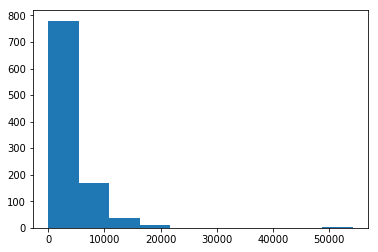

In [3]:

def nwords_for_doc(doc):
    ret = 0
    for token in doc:
        ret += 1
    return ret

plt.hist(df['doc'].apply(nwords_for_doc))


##  Plot letter distribution

(array([770., 172.,  41.,  14.,   1.,   0.,   0.,   0.,   0.,   2.]),
 array([2.700000e+01, 2.225680e+04, 4.448660e+04, 6.671640e+04,
        8.894620e+04, 1.111760e+05, 1.334058e+05, 1.556356e+05,
        1.778654e+05, 2.000952e+05, 2.223250e+05]),
 <a list of 10 Patch objects>)

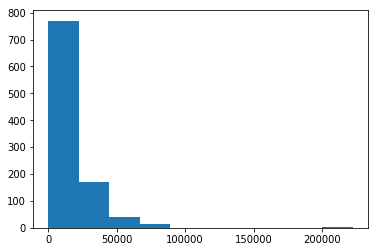

In [4]:

def nletters_for_doc(doc):
    ret = 0
    for token in doc:
        ret += len(token)
    return ret

plt.hist(df['doc'].apply(nletters_for_doc))


In [5]:
## POS - Nouns

(array([768., 175.,  40.,  13.,   1.,   1.,   0.,   0.,   0.,   2.]),
 array([   0. ,  930.7, 1861.4, 2792.1, 3722.8, 4653.5, 5584.2, 6514.9,
        7445.6, 8376.3, 9307. ]),
 <a list of 10 Patch objects>)

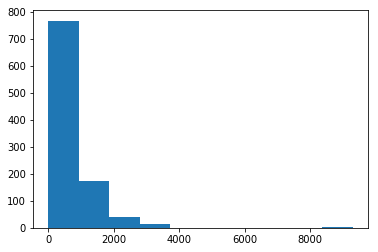

In [6]:

def nnouns_for_doc(doc):
    ret = 0
    for token in doc:
        if token.pos_ == 'NOUN':
            ret += 1
    return ret

plt.hist(df['doc'].apply(nnouns_for_doc))

## POS - Verbs

(array([733., 202.,  45.,  16.,   1.,   1.,   0.,   0.,   0.,   2.]),
 array([   0. ,  619.6, 1239.2, 1858.8, 2478.4, 3098. , 3717.6, 4337.2,
        4956.8, 5576.4, 6196. ]),
 <a list of 10 Patch objects>)

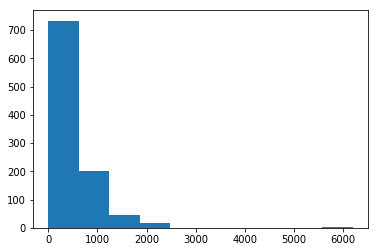

In [7]:

def nverbs_for_doc(doc):
    ret = 0
    for token in doc:
        if token.pos_ == 'VERB':
            ret += 1
    return ret

plt.hist(df['doc'].apply(nverbs_for_doc))

## POS - Adjectives

(array([810., 150.,  27.,  10.,   1.,   0.,   0.,   0.,   1.,   1.]),
 array([   0. ,  393.6,  787.2, 1180.8, 1574.4, 1968. , 2361.6, 2755.2,
        3148.8, 3542.4, 3936. ]),
 <a list of 10 Patch objects>)

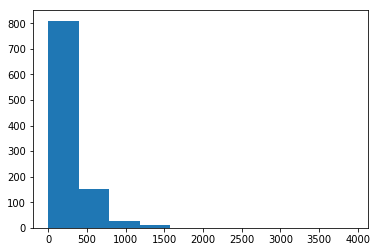

In [8]:

def nadjectives_for_doc(doc):
    ret = 0
    for token in doc:
        if token.pos_ == 'ADJ':
            ret += 1
    return ret

plt.hist(df['doc'].apply(nadjectives_for_doc))

## Generate trigrams of the relevant words

In [9]:

def process_doc(doc):
    trigrams = []

    last = []
    for t in doc:
        if t.is_stop:
            continue
        if t.is_punct:
            continue
        if t.is_space:
            continue

        norm = t.lemma_

        if len(norm) == 0:
            continue

        last.append(norm)
        if len(last) > 3:
            last = last[1:]

        if len(last) < 3:
            continue

        if t.pos_ != 'NOUN':
            continue

        trigrams.append(tuple(last))
    return trigrams

df['trigrams'] = df['doc'].apply(process_doc)


### Pick most common 1000 trigrams

In [10]:
from collections import Counter
import itertools

nfeatures = 1000

all_trigrams = []
for x in df['trigrams']:
    all_trigrams.extend(x)

c = Counter(all_trigrams)

selected_trigrams = [x for x, y in c.most_common(nfeatures)]


### Create feature vectors based on trigram frequency

In [11]:
def extract_feature(trigrams):
    c = Counter(trigrams)
    ft = np.zeros(nfeatures)
    for i, t in enumerate(selected_trigrams):
        if t in c:
            ft[i] = c[t]
    return ft

df['feature'] = df['trigrams'].apply(extract_feature)


## Train logistic regression

In [12]:
import numpy as np

X = df.iloc[:, 6].values
y = np.array(df['reversed'])

X = np.array([np.array(x) for x in X])

# Bring the variance to 1 on every column.
X /= np.std(X, axis=0)



In [13]:
import sklearn.linear_model
import sklearn.model_selection
import sklearn.metrics

assert X.shape[0] == y.shape[0]
assert X.shape[1] == nfeatures

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

model = sklearn.linear_model.LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

print('Accuracy =', model.score(X_test, y_test))
print('F1 = ', sklearn.metrics.f1_score(y_test, model.predict(X_test)))


Accuracy = 0.46
F1 =  0.564516129032258


## Perform grid search for best hyperparams

In [14]:
logreg = sklearn.linear_model.LogisticRegression(solver='liblinear')

parameters = {
    'penalty': ('l1', 'l2'),
    'C': [ 10**i for i in range(-5, 5)],
}

model = sklearn.model_selection.GridSearchCV(
    logreg,
    parameters,
    cv=4,
    error_score='raise',
    iid=False,
)
model.fit(X_train, y_train)

print('Got a best score of {} with params {}'.format(model.best_score_, model.best_params_))


Got a best score of 0.6311075115887061 with params {'C': 1e-05, 'penalty': 'l2'}


## Make each doc a sentence

In [126]:
dfs = df

dfs = dfs.drop(['year', 'file', 'trigrams', 'feature'], axis=1)

def expand_row_to_sents(row):
    doc = row['doc']
    sents = list(doc.sents)
    ret = []
    for s in sents:
        cur_row = row.copy()
        cur_row['sent'] = s
        ret.append(cur_row)
    return ret


def flatmap(df, func):
    rows = []
    cols = df.columns
    for r in df.values:
        index = 0
        row = {}
        for col in cols:
            row[col] = r[index]
            index += 1
        multrows = func(row)
        for rr in multrows:
            rows.append(rr)
    return pd.DataFrame.from_records(rows)

dfs = flatmap(dfs, expand_row_to_sents)

dfs = dfs.sample(n=10000)

print('We have {} sentences'.format(dfs.shape[0]))


We have 10000 sentences


### Employ Vader

#### Compute vader scores
We will treat each document as being a single sentence, and then classify them using Vader.

In [127]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

def vader_sentiment_score(sent):
    return sid.polarity_scores(str(sent))['compound']

dfs['vader_score'] = dfs['sent'].swifter.apply(vader_sentiment_score)


Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   5%|▍         | 495/10000 [00:00<00:01, 4948.18it/s]

Pandas Apply:   9%|▉         | 935/10000 [00:00<00:01, 4765.75it/s]

Pandas Apply:  14%|█▍        | 1387/10000 [00:00<00:01, 4688.63it/s]

Pandas Apply:  19%|█▊        | 1852/10000 [00:00<00:01, 4675.87it/s]

Pandas Apply:  23%|██▎       | 2265/10000 [00:00<00:01, 4497.14it/s]

Pandas Apply:  27%|██▋       | 2733/10000 [00:00<00:01, 4547.22it/s]

Pandas Apply:  32%|███▏      | 3175/10000 [00:00<00:01, 4506.91it/s]

Pandas Apply:  36%|███▋      | 3643/10000 [00:00<00:01, 4556.35it/s]

Pandas Apply:  41%|████      | 4114/10000 [00:00<00:01, 4598.65it/s]

Pandas Apply:  46%|████▌     | 4564/10000 [00:01<00:01, 4567.49it/s]

Pandas Apply:  50%|█████     | 5017/10000 [00:01<00:01, 4556.10it/s]

Pandas Apply:  55%|█████▍    | 5464/10000 [00:01<00:01, 4482.93it/s]

Pandas Apply:  59%|█████▉    | 5915/10000 [00:01<00:00, 4489.26it/s]

Pandas Apply:  64%|██████▍   | 6391/10000 [00:01<00:00, 4564.52it/s]

Pandas Apply:  69%|██████▊   | 6855/10000 [00:01<00:00, 4582.65it/s]

Pandas Apply:  73%|███████▎  | 7312/10000 [00:01<00:00, 4548.73it/s]

Pandas Apply:  78%|███████▊  | 7779/10000 [00:01<00:00, 4579.03it/s]

Pandas Apply:  82%|████████▏ | 8237/10000 [00:01<00:00, 4498.04it/s]

Pandas Apply:  87%|████████▋ | 8687/10000 [00:01<00:00, 4445.46it/s]

Pandas Apply:  91%|█████████▏| 9132/10000 [00:02<00:00, 4394.71it/s]

Pandas Apply:  96%|█████████▌| 9572/10000 [00:02<00:00, 4365.29it/s]

Pandas Apply: 100%|██████████| 10000/10000 [00:02<00:00, 4495.95it/s]

#### Show top 10 and bottom 10 sentences

In [128]:

dfs = dfs.sort_values('vader_score')

print('Highest rated sentences: ')
for r in dfs[:10]['sent']:
    print(str(r))
    print('-' * 100)

print('=' * 100)
print('=' * 100)

print('Lowest rated sentences: ')
for r in dfs[-10:]['sent']:
    print(str(r))
    print('-' * 100)


Highest rated sentences: 
Thus, where an element of aggravated murder is a felony such as rape or armed robbery, the court must determine which felony the state is trying to prove to determine whether there is double jeopardy.

----------------------------------------------------------------------------------------------------
The most horrifying involved the murder of four prisoners of war by South Vietnamese police in the presence of an American advisor, who callously failed to intervene.

----------------------------------------------------------------------------------------------------
The district court rejected Cole's evidence of organic neurological deficiency because the "[t]estimony from Dr. Jarvis Wright fail[ed] to establish that Cole actually suffers from any organic brain damage, let alone that the disorder constitutes a `uniquely severe handicap' to which Cole's criminal act was attributable.
-------------------------------------------------------------------------------

## Compute TfIdf frequencies

In [153]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

corpus = dfs['sent'].swifter.apply(str)

X_tfidf = vectorizer.fit_transform(corpus)


Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 1/10000 [00:00<22:17,  7.48it/s]

Pandas Apply:  11%|█▏        | 1131/10000 [00:00<13:50, 10.68it/s]

Pandas Apply:  15%|█▍        | 1468/10000 [00:00<09:21, 15.20it/s]

Pandas Apply:  17%|█▋        | 1742/10000 [00:00<06:21, 21.64it/s]

Pandas Apply:  20%|█▉        | 1987/10000 [00:00<04:20, 30.70it/s]

Pandas Apply:  22%|██▏       | 2200/10000 [00:00<02:59, 43.44it/s]

Pandas Apply:  25%|██▌       | 2516/10000 [00:01<02:01, 61.69it/s]

Pandas Apply:  28%|██▊       | 2775/10000 [00:01<01:22, 87.23it/s]

Pandas Apply:  31%|███       | 3062/10000 [00:01<00:56, 123.01it/s]

Pandas Apply:  33%|███▎      | 3314/10000 [00:01<00:38, 171.88it/s]

Pandas Apply:  36%|███▌      | 3561/10000 [00:01<00:27, 238.37it/s]

Pandas Apply:  38%|███▊      | 3811/10000 [00:01<00:18, 327.15it/s]

Pandas Apply:  41%|████      | 4067/10000 [00:01<00:13, 443.01it/s]

Pandas Apply:  43%|████▎     | 4317/10000 [00:01<00:09, 584.22it/s]

Pandas Apply:  46%|████▌     | 4602/10000 [00:01<00:07, 767.08it/s]

Pandas Apply:  49%|████▉     | 4901/10000 [00:02<00:05, 987.12it/s]

Pandas Apply:  52%|█████▏    | 5170/10000 [00:02<00:03, 1216.48it/s]

Pandas Apply:  55%|█████▍    | 5456/10000 [00:02<00:03, 1469.59it/s]

Pandas Apply:  58%|█████▊    | 5769/10000 [00:02<00:02, 1747.71it/s]

Pandas Apply:  61%|██████    | 6054/10000 [00:02<00:02, 1942.24it/s]

Pandas Apply:  63%|██████▎   | 6333/10000 [00:02<00:01, 2098.01it/s]

Pandas Apply:  66%|██████▋   | 6631/10000 [00:02<00:01, 2300.76it/s]

Pandas Apply:  69%|██████▉   | 6940/10000 [00:02<00:01, 2490.84it/s]

Pandas Apply:  73%|███████▎  | 7255/10000 [00:02<00:01, 2657.32it/s]

Pandas Apply:  76%|███████▌  | 7552/10000 [00:02<00:01, 2413.13it/s]

Pandas Apply:  78%|███████▊  | 7820/10000 [00:03<00:00, 2246.58it/s]

Pandas Apply:  81%|████████  | 8065/10000 [00:03<00:00, 2140.61it/s]

Pandas Apply:  83%|████████▎ | 8295/10000 [00:03<00:00, 2076.14it/s]

Pandas Apply:  85%|████████▌ | 8514/10000 [00:03<00:00, 2008.83it/s]

Pandas Apply:  87%|████████▋ | 8745/10000 [00:03<00:00, 2089.36it/s]

Pandas Apply:  90%|████████▉ | 8993/10000 [00:03<00:00, 2190.64it/s]

Pandas Apply:  92%|█████████▏| 9218/10000 [00:03<00:00, 2050.27it/s]

Pandas Apply:  94%|█████████▍| 9429/10000 [00:03<00:00, 2027.57it/s]

Pandas Apply:  96%|█████████▋| 9636/10000 [00:04<00:00, 1995.64it/s]

Pandas Apply:  99%|█████████▊| 9867/10000 [00:04<00:00, 2076.58it/s]

Pandas Apply: 100%|██████████| 10000/10000 [00:04<00:00, 2381.53it/s]

### Compute sosine similarities

In [154]:
from sklearn.metrics.pairwise import cosine_similarity

S = cosine_similarity(X_tfidf)

used = {}
threshold = 0.8
print('Looking for similar docs')
found = 0
for i in range(S.shape[0]):
    if found > 10 or i in used:
        continue
    for j in range(i):
        # Some phrases maybe are repeated, so we do not want them to have similarity 1.0 exactly.
        if found > 10 or j in used or S[i, j] < threshold or S[i, j] > 0.9:
            continue
        used[i] = True
        used[j] = True
        found += 1
        print('=' * 100)
        print(dfs.iloc[i]['sent'])
        print('-' * 100)
        print(dfs.iloc[j]['sent'])
        print('=' * 100)


threshold = 0
print('Looking for different docs')
used = {}
found = 0
for i in range(S.shape[0]):
    if found > 10 or i in used:
        continue
    for j in range(i):
        if found > 10 or j in used or S[i, j] > threshold:
            continue
        used[i] = True
        used[j] = True
        found += 1
        print('=' * 100)
        print(dfs.iloc[i]['sent'])
        print('-' * 100)
        print(dfs.iloc[j]['sent'])
        print('=' * 100)


Looking for similar docs


(emphasis in original).

----------------------------------------------------------------------------------------------------
Id. (emphasis in original).

Id .

----------------------------------------------------------------------------------------------------
Id. at 4-5 .

(1964) (emphasis supplied).

----------------------------------------------------------------------------------------------------
(Emphasis supplied.)



53
----------------------------------------------------------------------------------------------------
53 S.Ct.
Accordingly, the judgment of the district court is affirmed.

----------------------------------------------------------------------------------------------------
The judgment of the District Court is affirmed.

Rep.
----------------------------------------------------------------------------------------------------
See H.R.Rep.

It is so ordered.

----------------------------------------------------------------------------------------------------
So ordered .



61
----------------------------------------------------------------------------------------------------
61 S.Ct.


"
Id. at 3 .

----------------------------------------------------------------------------------------------------
"
Id.
"
Id. at 3 .

----------------------------------------------------------------------------------------------------
Id .

"
Id. at 3 .

----------------------------------------------------------------------------------------------------
Id .

Looking for different docs
t]he murder was especially heinous, atrocious, or cruel in that it involved torture or depravity of mind.
----------------------------------------------------------------------------------------------------
The prosecutor's improper summation remarks violated numerous constitutional rights guaranteed to state criminal defendants, and were so prejudicial to Agard as to be considered harmful error.

Obsolescence may and does occur, resulting in an estate more obsolete, when less used or more neglected, without forthwith rendering it entirely obsolete, useless, and fit only to be abandoned.

--------------

## Use KMeans to assign the sentences to 10 clusters

In [164]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=20)
model.fit(X_tfidf)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [182]:

for i in range(20):
    print('=' * 100)
    print('Samples of sentences in cluster {}'.format(i))
    cur_df = corpus[model.labels_ == i]
    if cur_df.shape[0] > 5:
        cur_df = cur_df.sample(5)
    for s in cur_df:
        print(str(s))
    print('=' * 100)


Samples of sentences in cluster 0
Covert practices are as efficient as overt action.

Samples of sentences in cluster 1
Janz testified that she did not specifically monitor for religious symbols in the special education classrooms, but that if she observed a religious symbol in the classrooms, she "would ask that they remove it."
Barbara Turner Windhorst, the director of special education from June of 1982 to January of 1987, was not aware of any JPPSS policy which required the director of special education to observe whether religious symbols were present in the special education classrooms.

Samples of sentences in cluster 2
Williams concerned the refusal of the trial court to furnish the defendant with an independent pathologist to serve as an expert witness concerning the cause of the victim's death.

Samples of sentences in cluster 3
Rush is the HMO provider for the plan.

(when there is question as to whether client or attorney is at fault, interests of two become adverse and cli